Outlier Detection

In [95]:
# Importing the necessary libraries into the environment
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from sklearn.neighbors import LocalOutlierFactor

In [96]:
# Load the data into the environment
df = pd.read_pickle("processed_data.pkl")

# Displaying the first five rows of the dataframe
df.head()

acc_x     acc_y     acc_z  ...  label  category  set
epoch (ms)                                             ...                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000  ...  bench     heavy   30
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500  ...  bench     heavy   30
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  ...  bench     heavy   30
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  ...  bench     heavy   30
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  ...  bench     heavy   30

[5 rows x 10 columns]

In [97]:
outlier_columns = list(df.columns[:6])
print(outlier_columns)

['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']


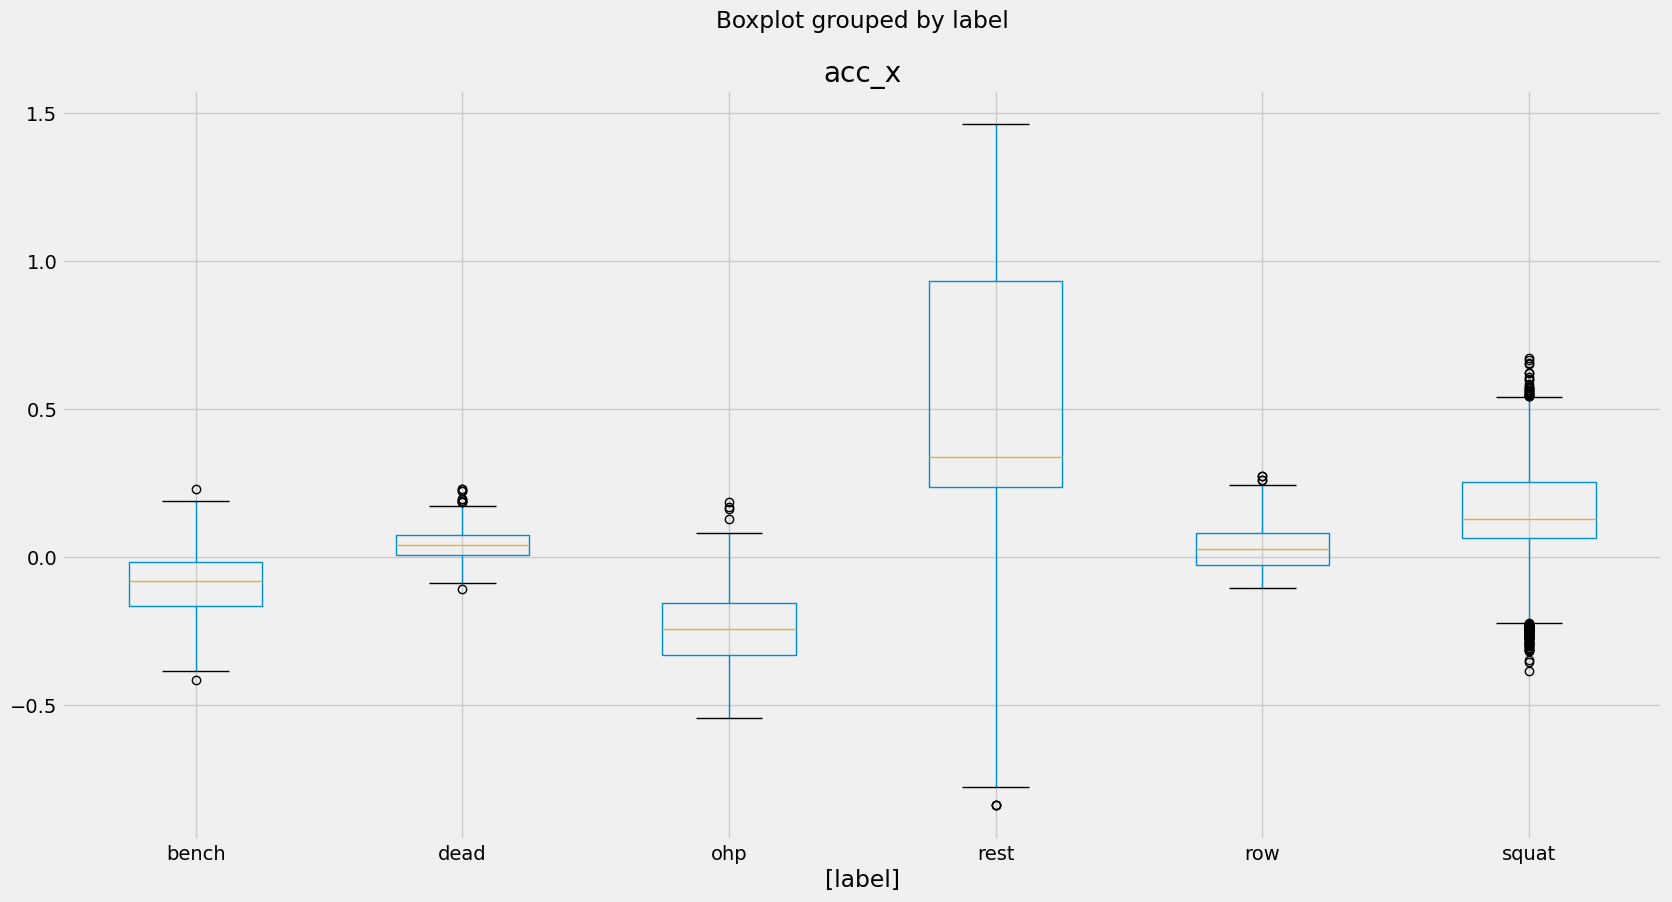

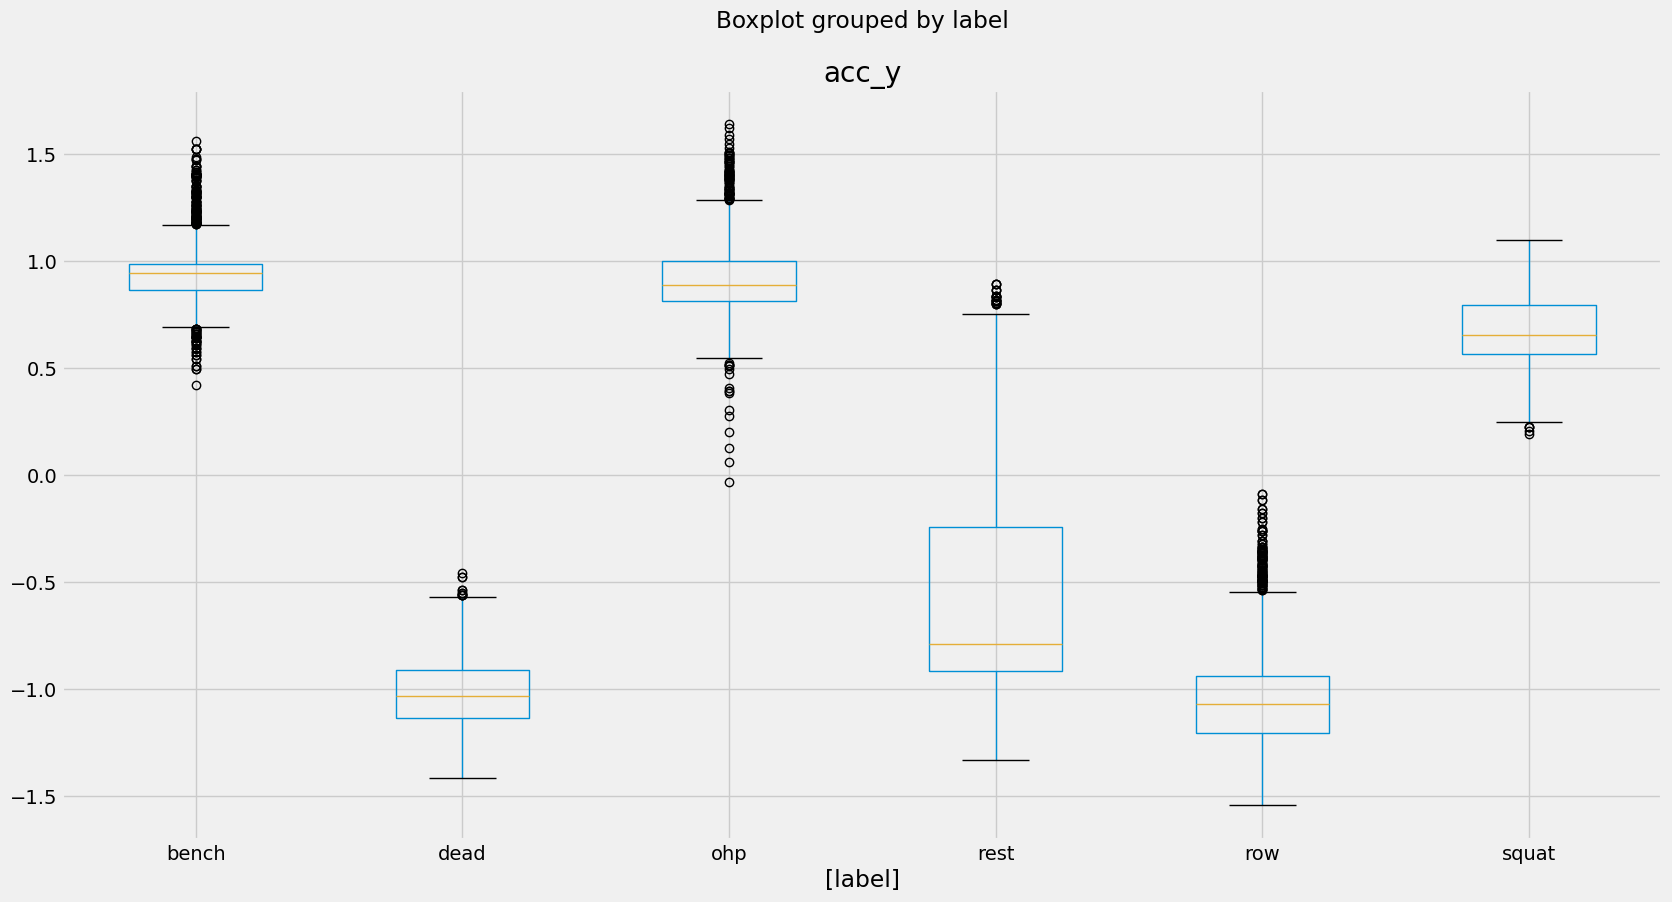

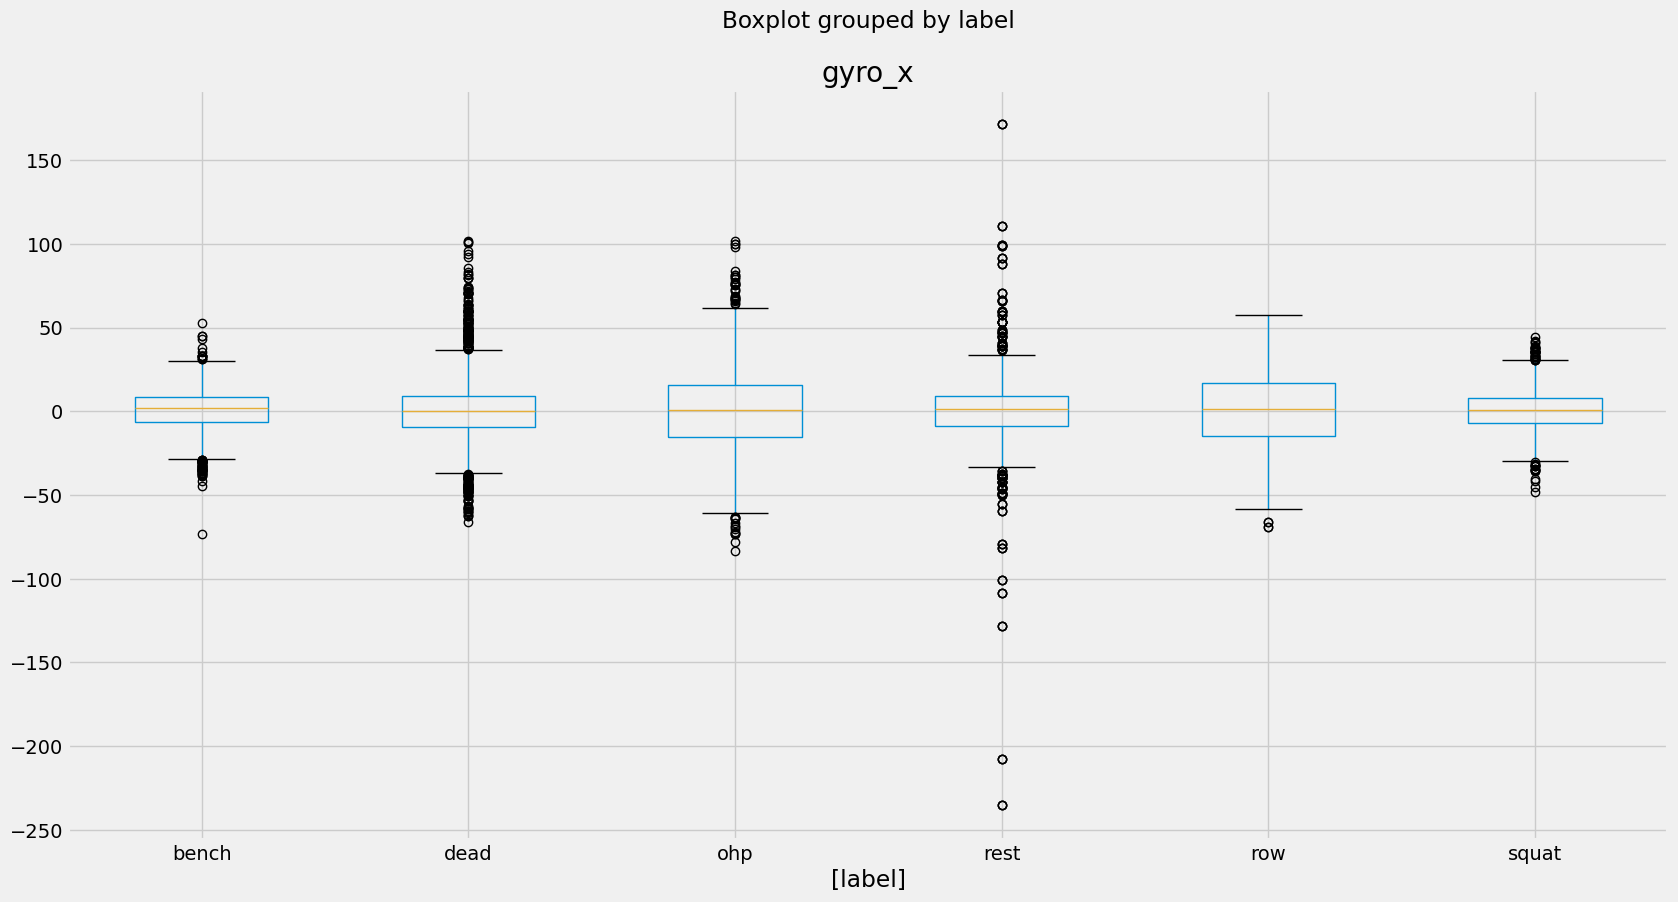

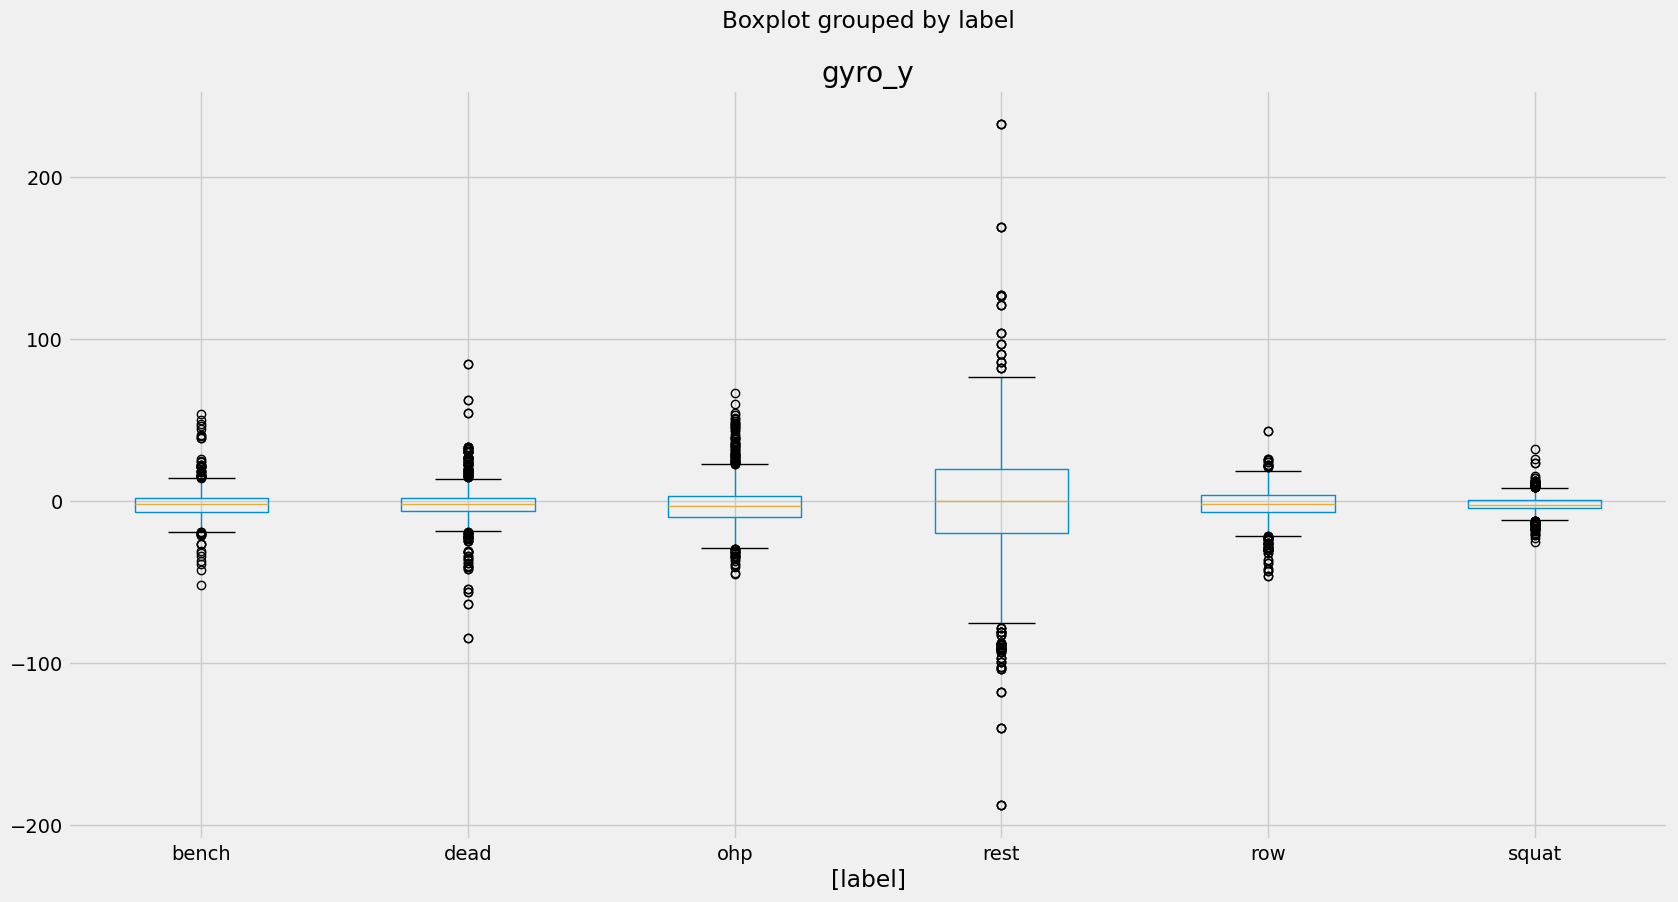

In [98]:
# Plotting Outliers
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 100

# Visualizing the outliers in acc_x
ax = df[["acc_x","label"]].boxplot(by="label",figsize = (20,10))
plt.show()

# Visualizing the outliers in acc_y
ay = df[["acc_y","label"]].boxplot(by="label",figsize = (20,10))
plt.show()

# Visualizing the outliers in gyro_x
gx = df[["gyro_x","label"]].boxplot(by="label",figsize = (20,10))
plt.show()

# Visualizing the outliers in gyro_y
gy = df[["gyro_y","label"]].boxplot(by="label",figsize = (20,10))
plt.show()

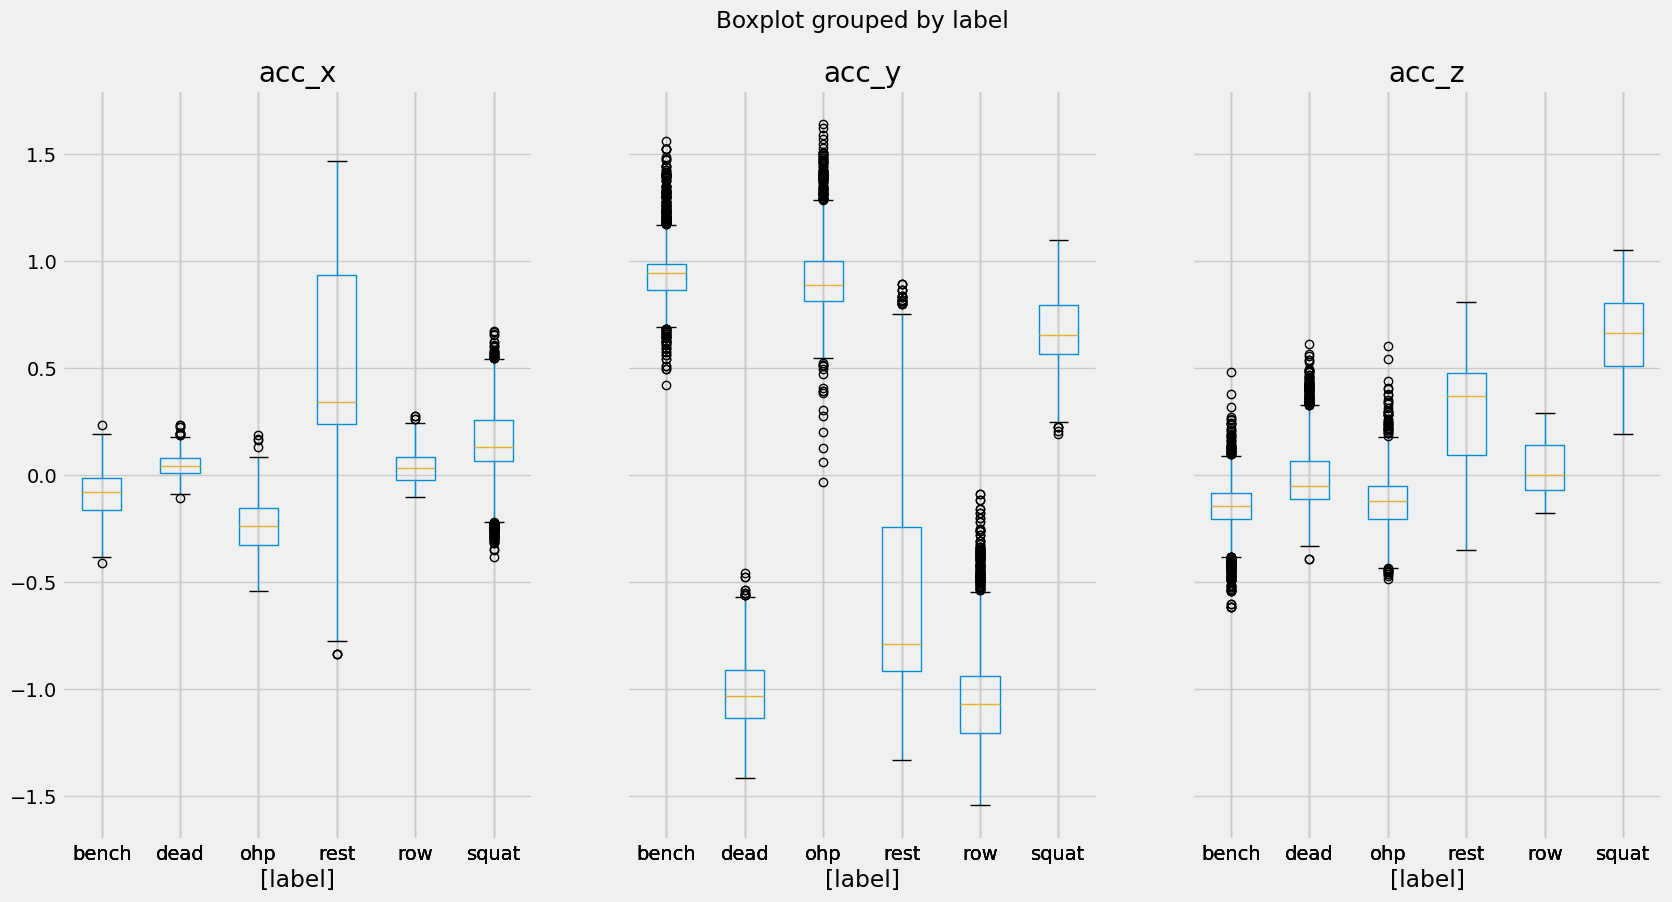

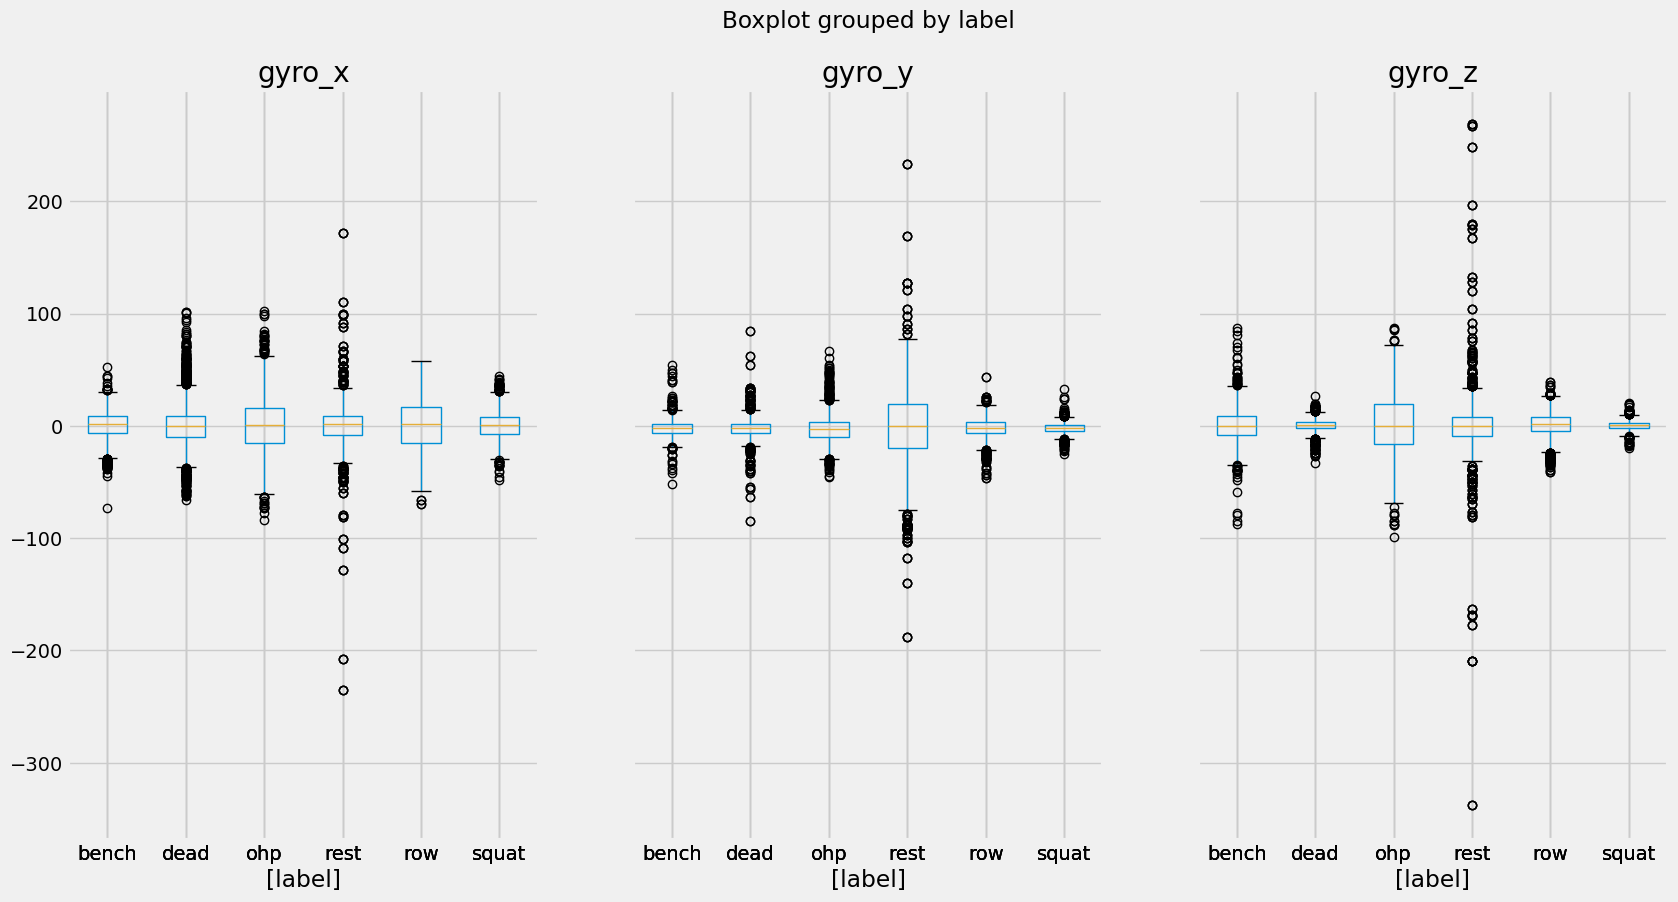

In [99]:
# Box plot for the accelometer columns grouped by label
acc = df[outlier_columns[:3] + ["label"]].boxplot(by="label", figsize = (20,10),layout=(1,3))
plt.show()

# Box plot for the gyroscope columns grouped by label
gyr = df[outlier_columns[3:] + ["label"]].boxplot(by="label", figsize = (20,10),layout=(1,3))
plt.show()

In [100]:
# Plotting outliers in time
def plot_binary_outliers(dataset, col, outlier_col, reset_index):
    """ Plot outliers in case of a binary outlier score. Here, the col specifies the real data
    column and outlier_col the columns with a binary value (outlier or not).

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): Column that you want to plot
        outlier_col (string): Outlier column marked with true/false
        reset_index (bool): whether to reset the index for plotting
    """

    # Taken from: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/util/VisualizeDataset.py

    dataset = dataset.dropna(axis=0, subset=[col, outlier_col])
    dataset[outlier_col] = dataset[outlier_col].astype("bool")

    if reset_index:
        dataset = dataset.reset_index()

    fig, ax = plt.subplots()

    plt.xlabel("samples")
    plt.ylabel("value")

    # Plot non outliers in default color
    ax.plot(
        dataset.index[~dataset[outlier_col]],
        dataset[col][~dataset[outlier_col]],
        "+",
    )
    # Plot data points that are outliers in red
    ax.plot(
        dataset.index[dataset[outlier_col]],
        dataset[col][dataset[outlier_col]],
        "r+",
    )

    plt.legend(
        ["outlier " + col, "no outlier " + col],
        loc="upper center",
        ncol=2,
        fancybox=True,
        shadow=True,
    )
    plt.show()

In [101]:
# Inserting the IQR function
def mark_outliers_iqr(dataset, col):
    """Function to mark values as outliers using the IQR method.

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column 
        indicating whether the value is an outlier or not.
    """

    dataset = dataset.copy()

    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataset[col + "_outlier"] = (dataset[col] < lower_bound) | (
        dataset[col] > upper_bound
    )

    return dataset

In [102]:
# Plotting a single column
col = "acc_x"
dataset = mark_outliers_iqr(df, col)
dataset

acc_x     acc_y  ...  set  acc_x_outlier
epoch (ms)                                   ...                    
2019-01-11 15:08:05.200  0.013500  0.977000  ...   30          False
2019-01-11 15:08:05.400 -0.001500  0.970500  ...   30          False
2019-01-11 15:08:05.600  0.001333  0.971667  ...   30          False
2019-01-11 15:08:05.800 -0.024000  0.957000  ...   30          False
2019-01-11 15:08:06.000 -0.028000  0.957667  ...   30          False
...                           ...       ...  ...  ...            ...
2019-01-20 17:33:27.000 -0.048000 -1.041500  ...   90          False
2019-01-20 17:33:27.200 -0.037000 -1.030333  ...   90          False
2019-01-20 17:33:27.400 -0.060000 -1.031000  ...   90          False
2019-01-20 17:33:27.600 -0.038667 -1.025667  ...   90          False
2019-01-20 17:33:27.800 -0.044000 -1.034000  ...   90          False

[9009 rows x 11 columns]

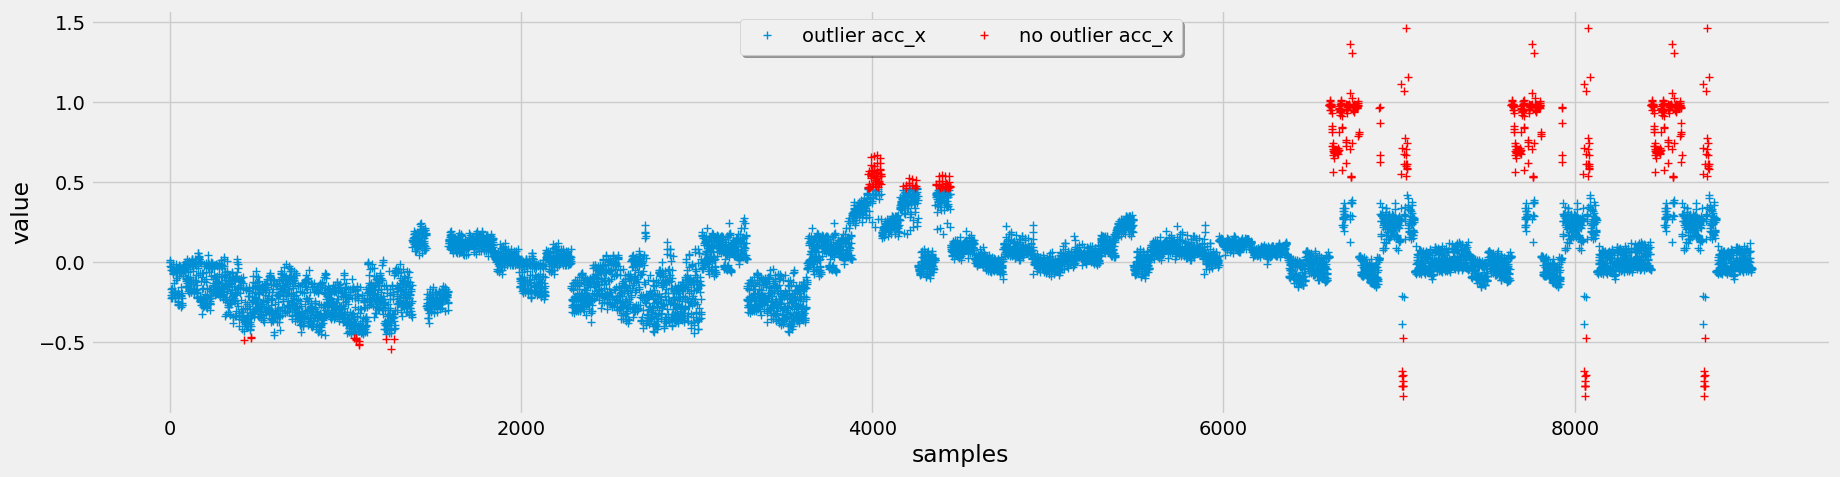

In [103]:
# Plotting the outliers
plot_binary_outliers(dataset=dataset,col = col,outlier_col=col + "_outlier",reset_index=True)

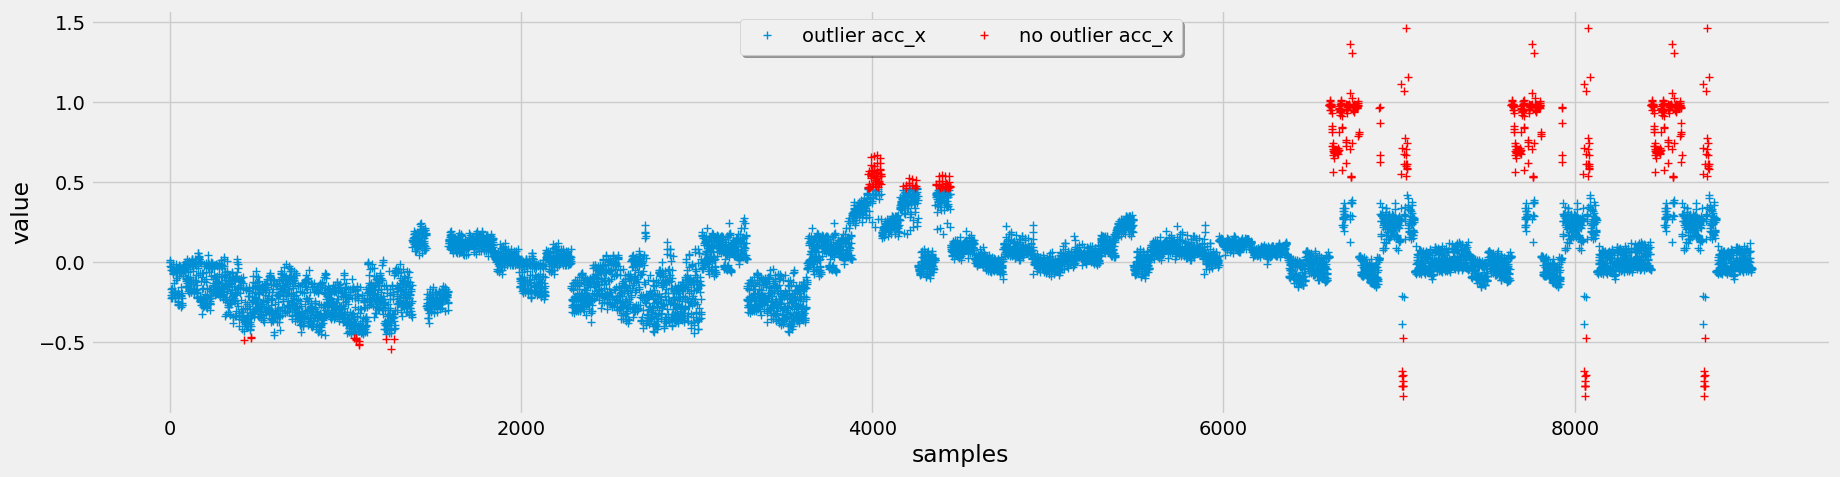

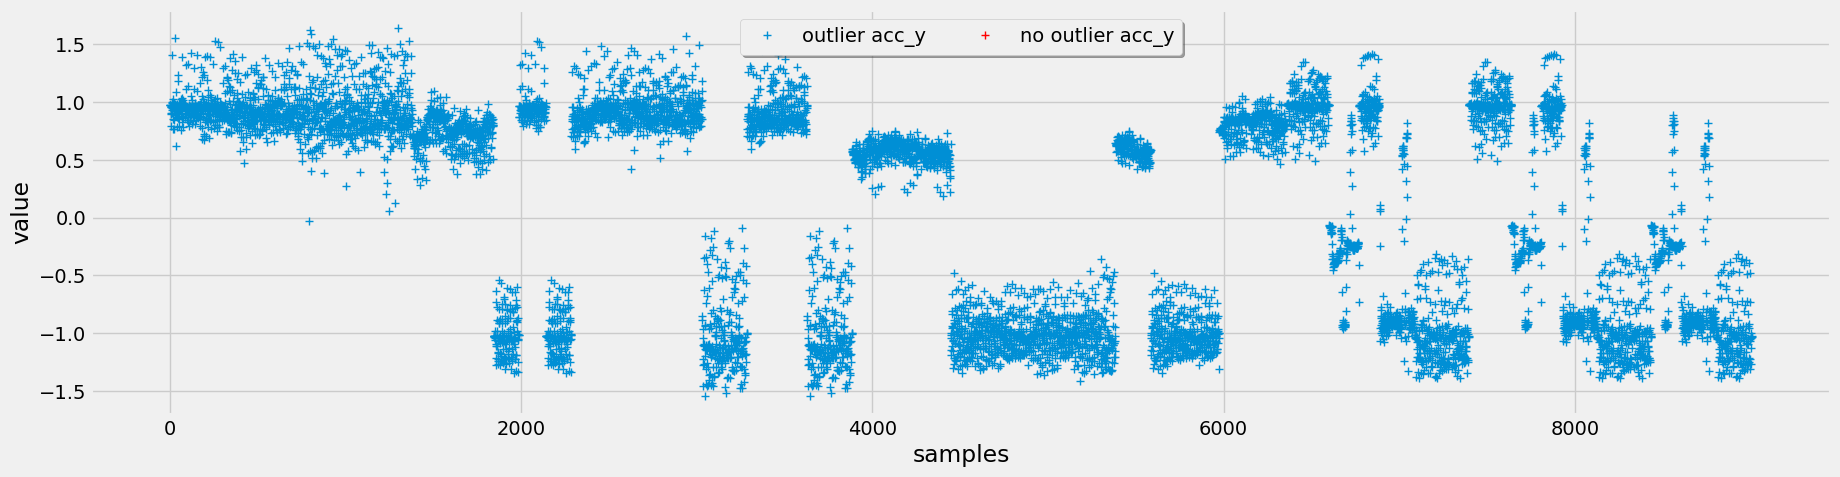

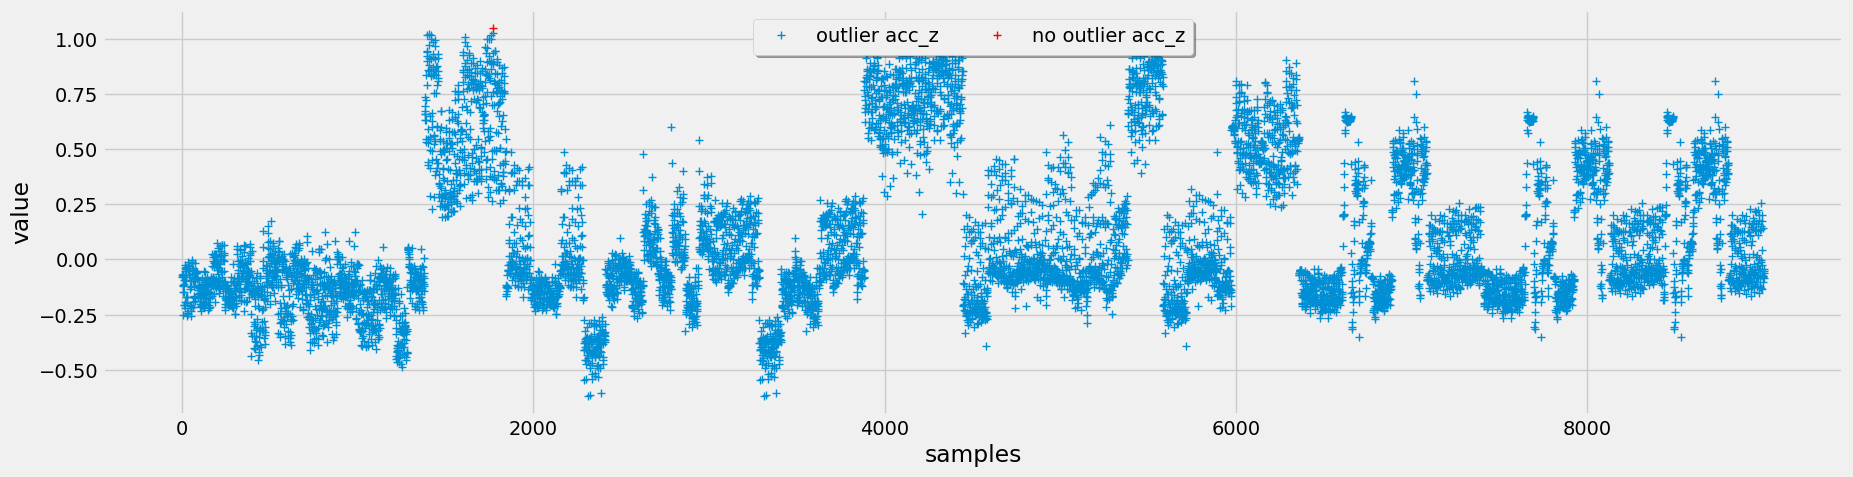

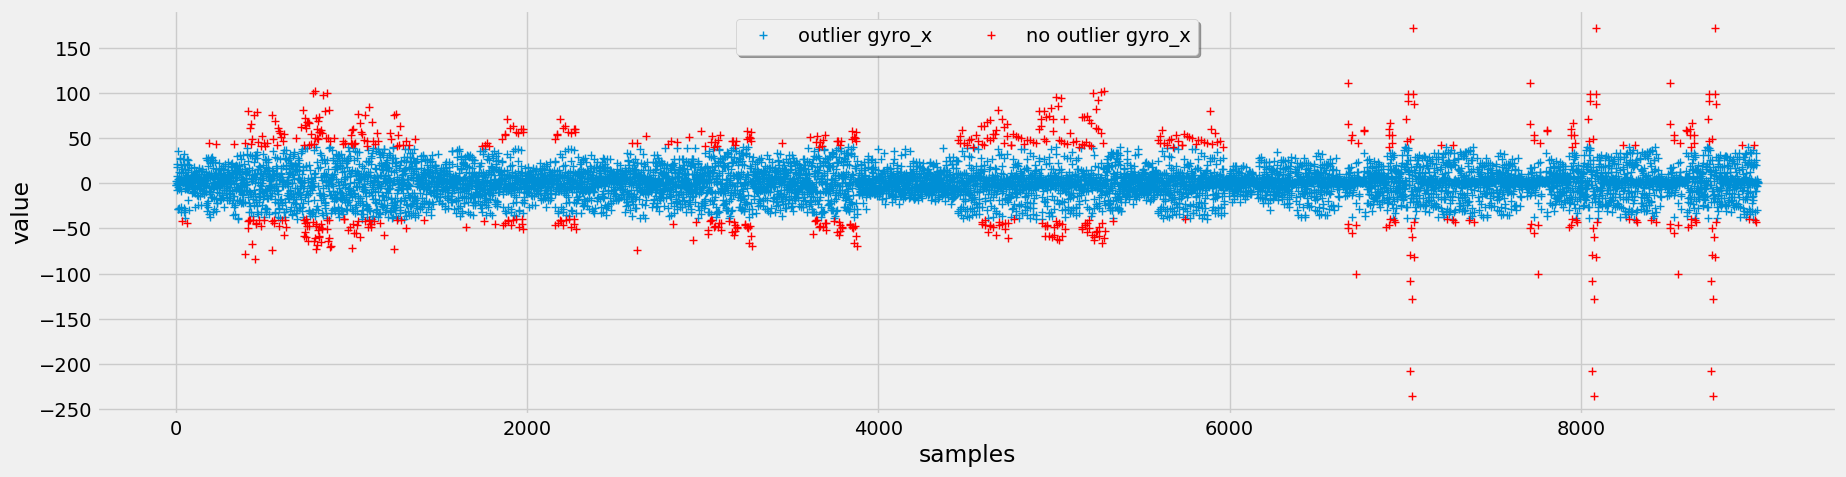

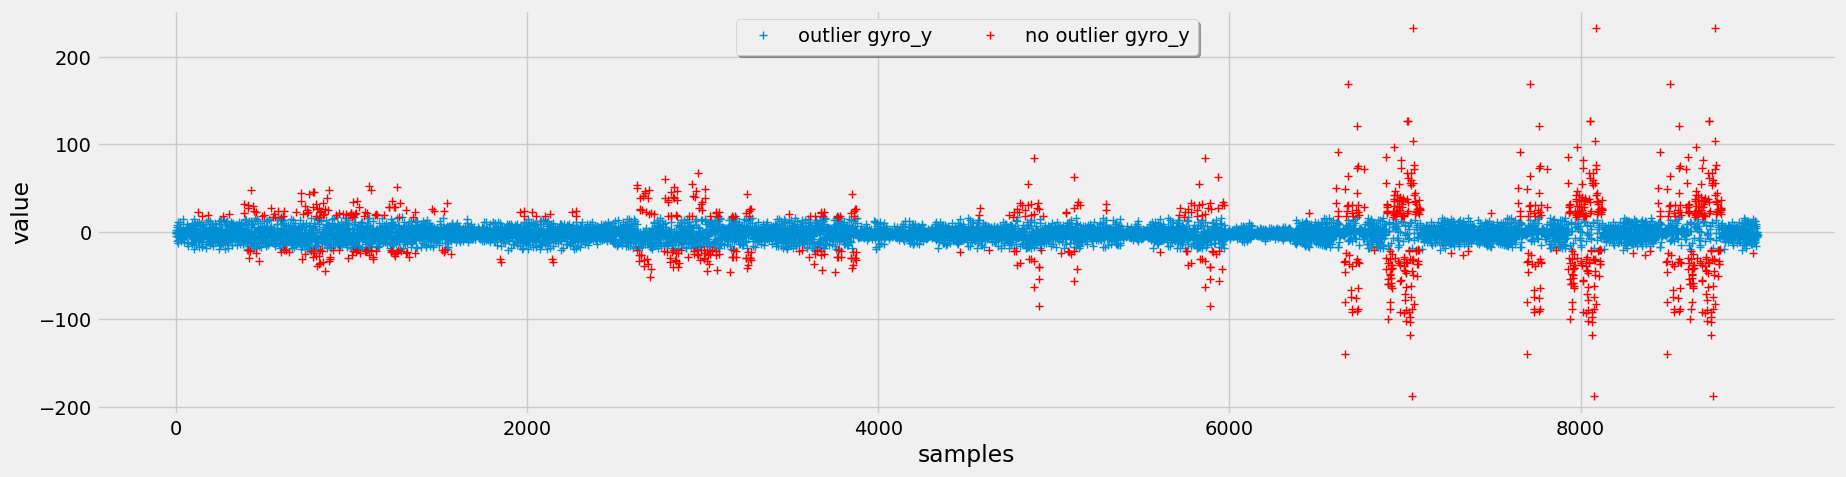

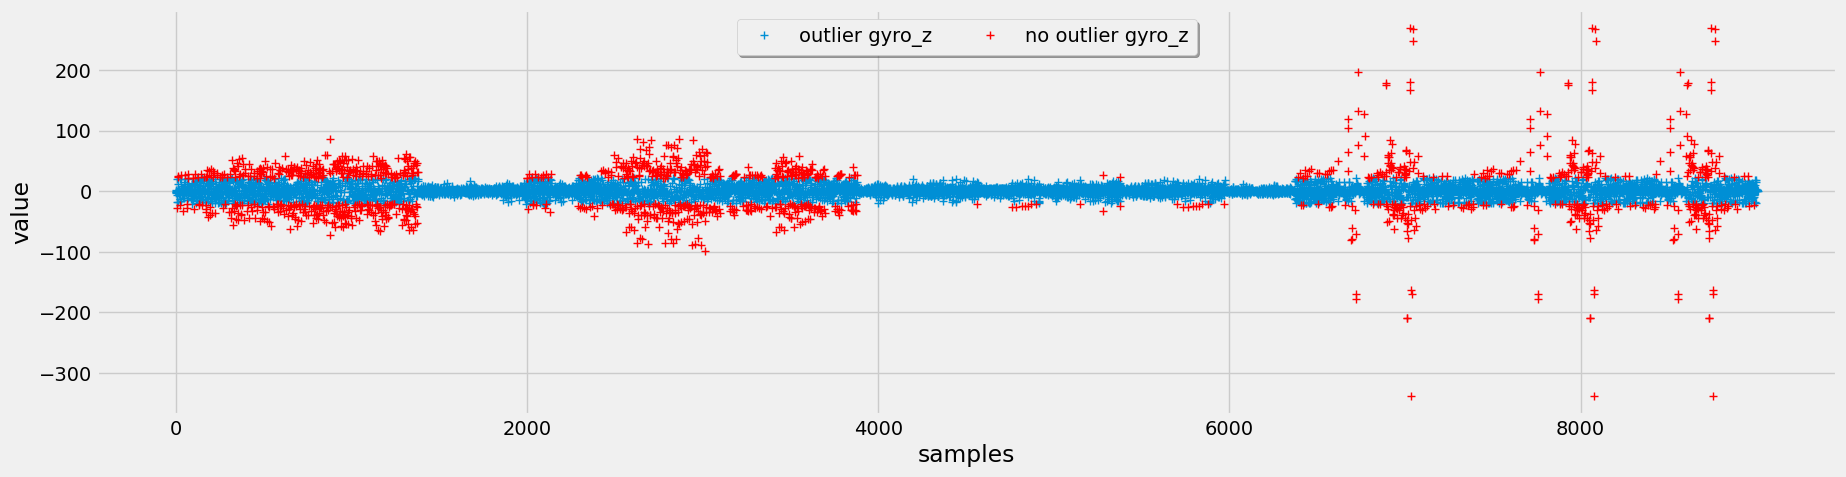

In [104]:
# Loop over all the columns
for col in outlier_columns:
    dataset = mark_outliers_iqr(df, col)
    plot_binary_outliers(dataset=dataset,col = col,outlier_col=col + "_outlier",reset_index=True)

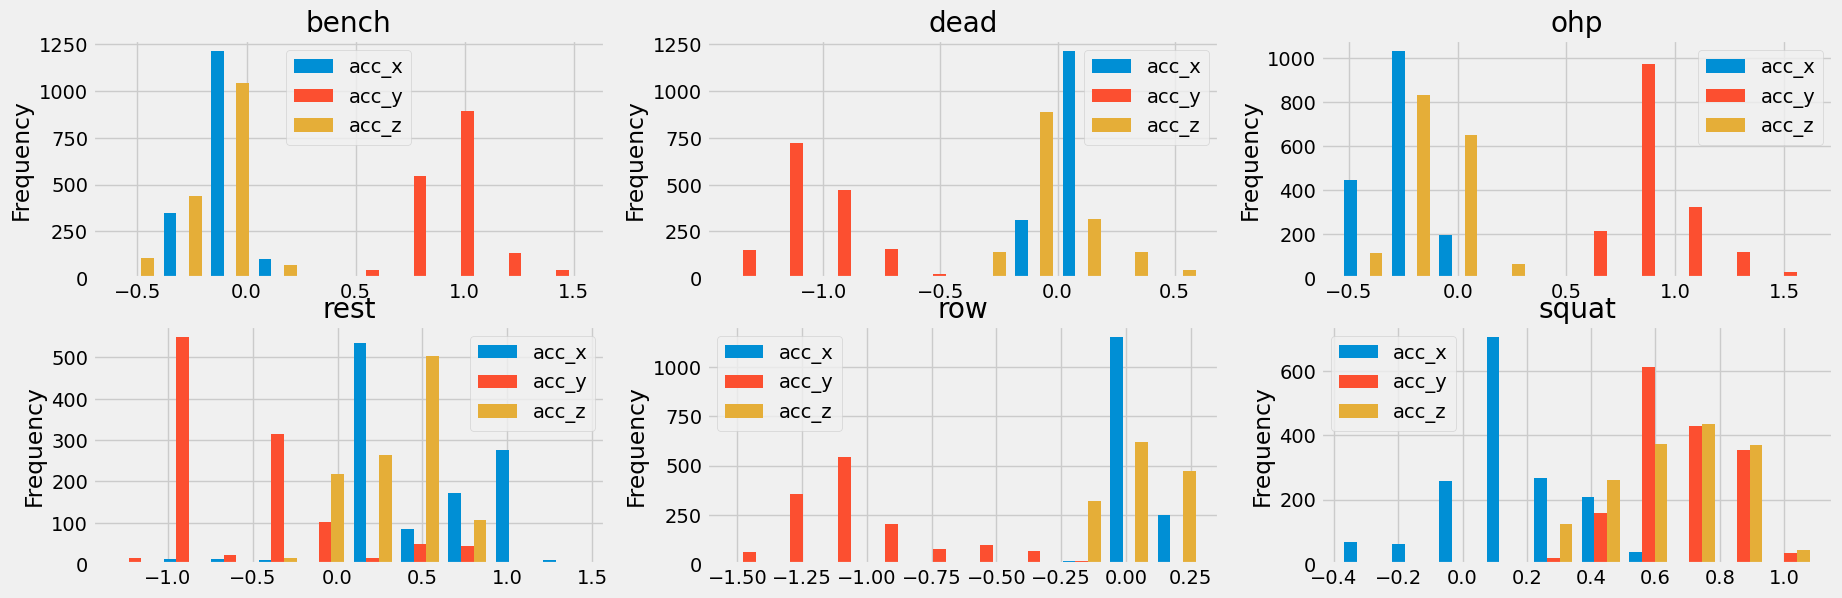

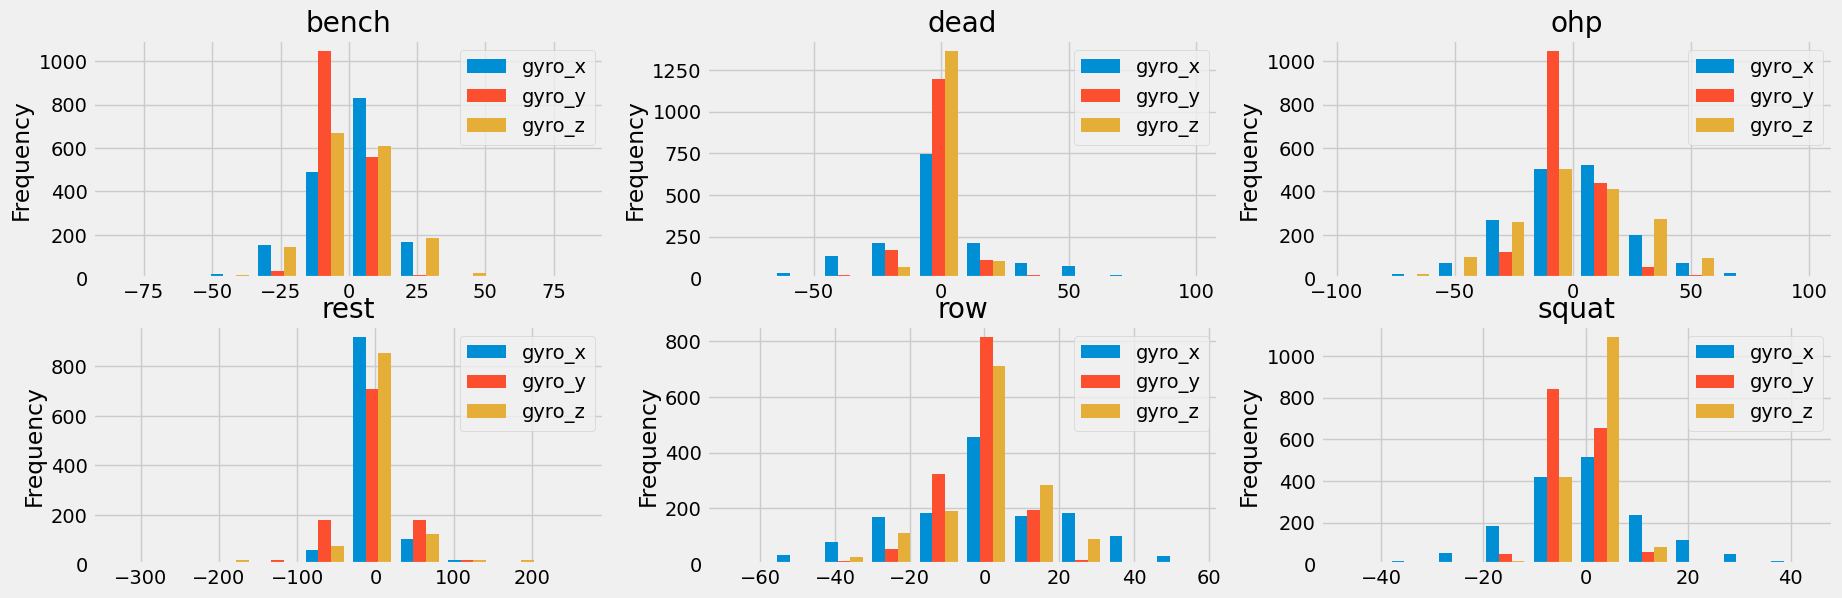

In [105]:
# Check if the dataframe is normally distributed
acc = df[outlier_columns[:3] + ["label"]].plot.hist(by="label", figsize = (20,10),layout=(3,3))
plt.show()

gyr = df[outlier_columns[3:] + ["label"]].plot.hist(by="label", figsize = (20,10),layout=(3,3))
plt.show()

In [106]:
# Insert the chauvanets function
def mark_outliers_chauvenet(dataset, col, C=2):
    """Finds outliers in the specified column of datatable and adds a binary column with
    the same name extended with '_outlier' that expresses the result per data point.
    
    Taken from: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/Chapter3/OutlierDetection.py

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to
        C (int, optional): Degree of certainty for the identification of outliers given the assumption 
                           of a normal distribution, typicaly between 1 - 10. Defaults to 2.

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column 
        indicating whether the value is an outlier or not.
    """

    dataset = dataset.copy()
    # Compute the mean and standard deviation.
    mean = dataset[col].mean()
    std = dataset[col].std()
    N = len(dataset.index)
    criterion = 1.0 / (C * N)

    # Consider the deviation for the data points.
    deviation = abs(dataset[col] - mean) / std

    # Express the upper and lower bounds.
    low = -deviation / math.sqrt(C)
    high = deviation / math.sqrt(C)
    prob = []
    mask = []

    # Pass all rows in the dataset.
    for i in range(0, len(dataset.index)):
        # Determine the probability of observing the point
        prob.append(
            1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
        )
        # And mark as an outlier when the probability is below our criterion.
        mask.append(prob[i] < criterion)
    dataset[col + "_outlier"] = mask
    return dataset

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


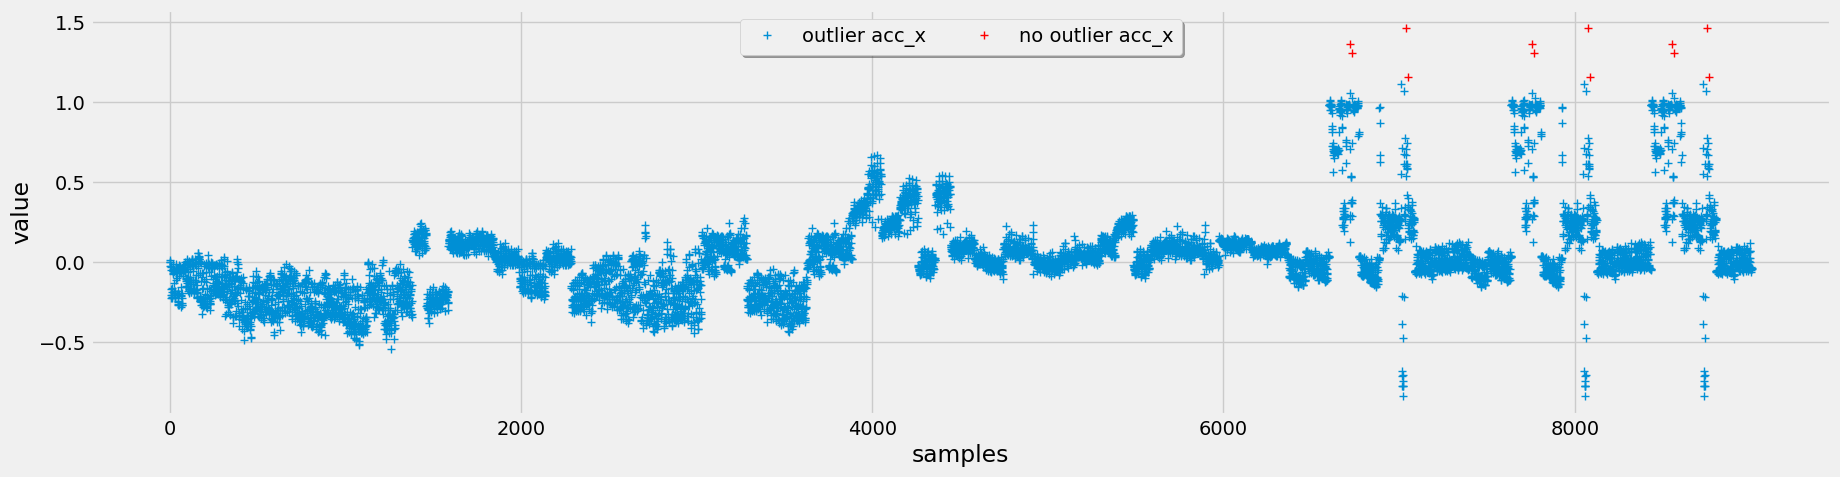

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


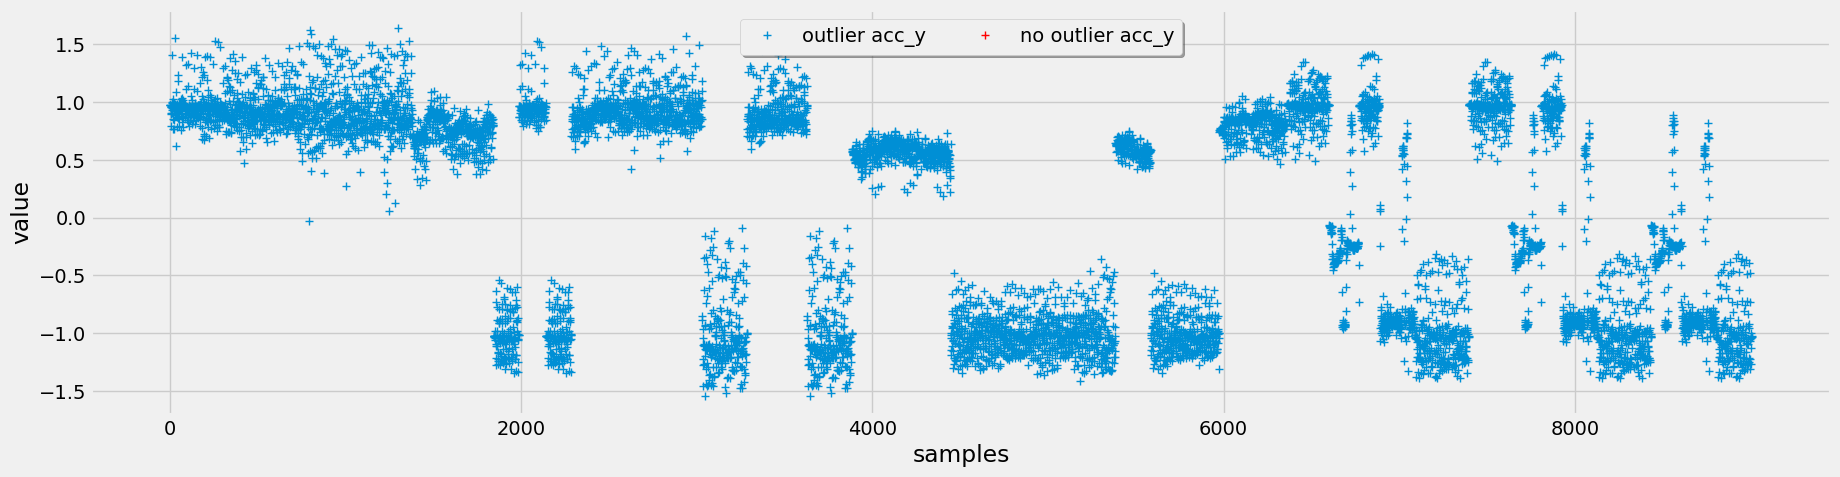

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


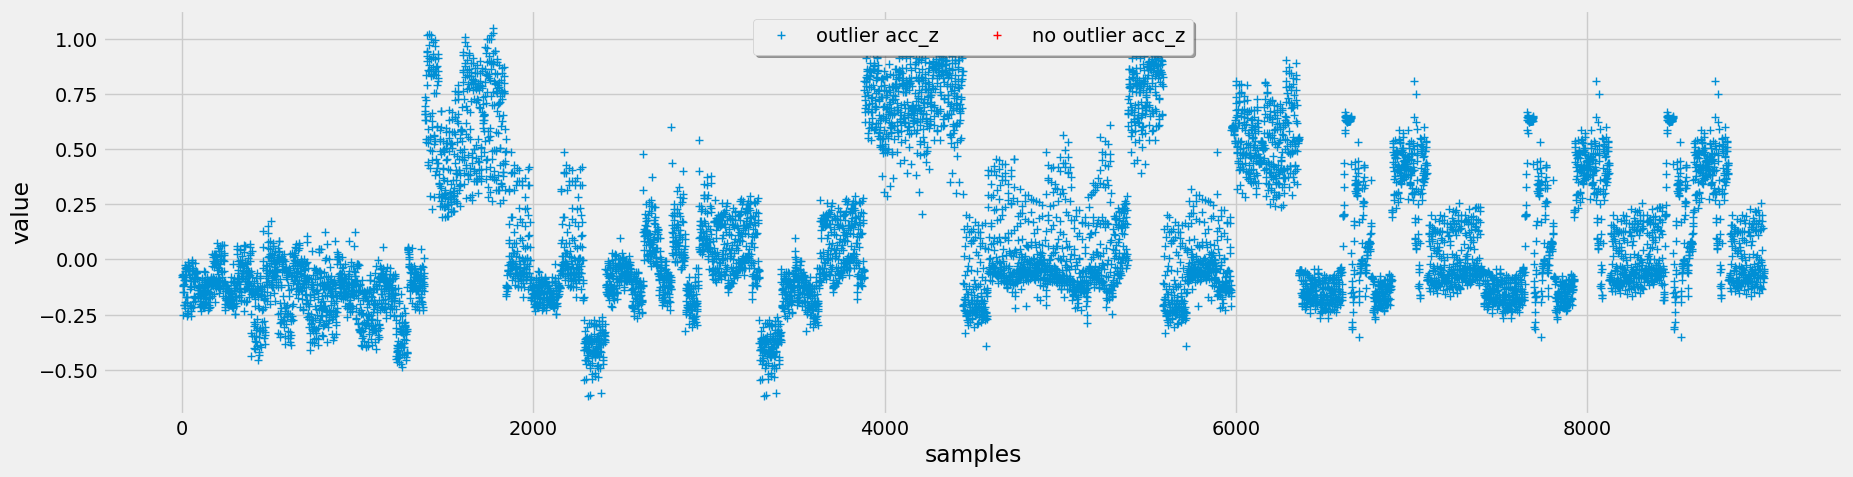

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


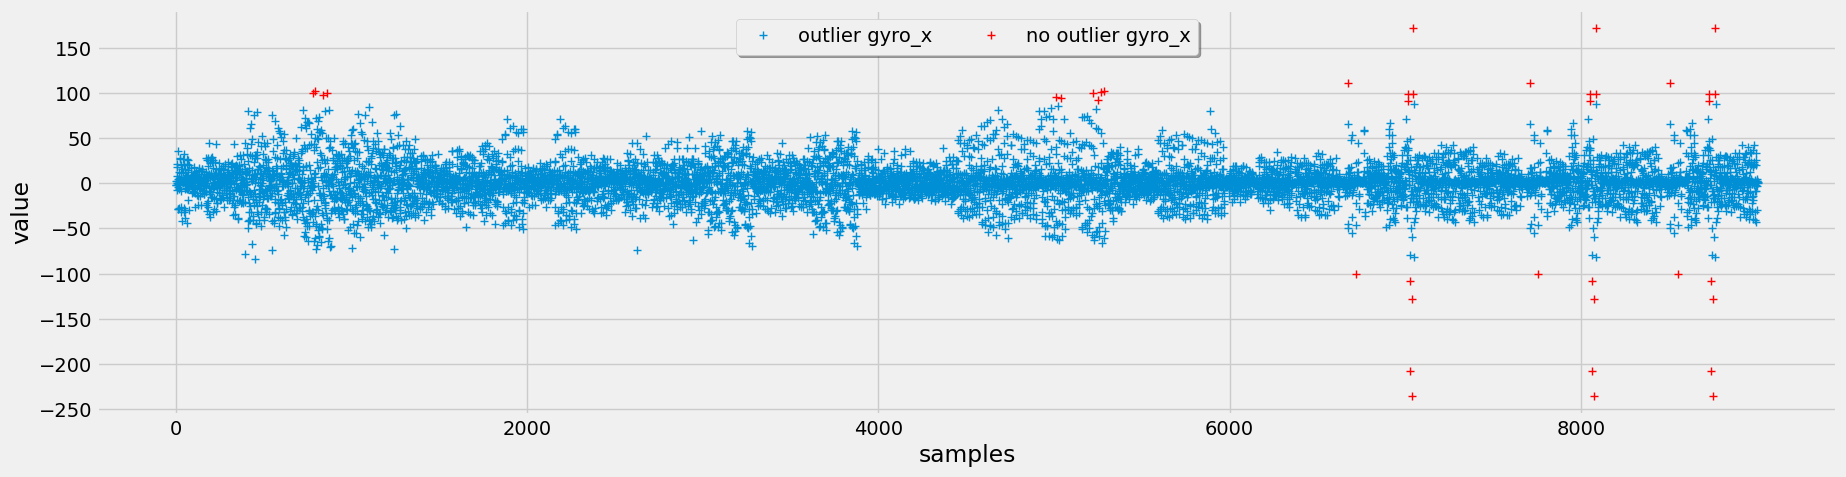

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


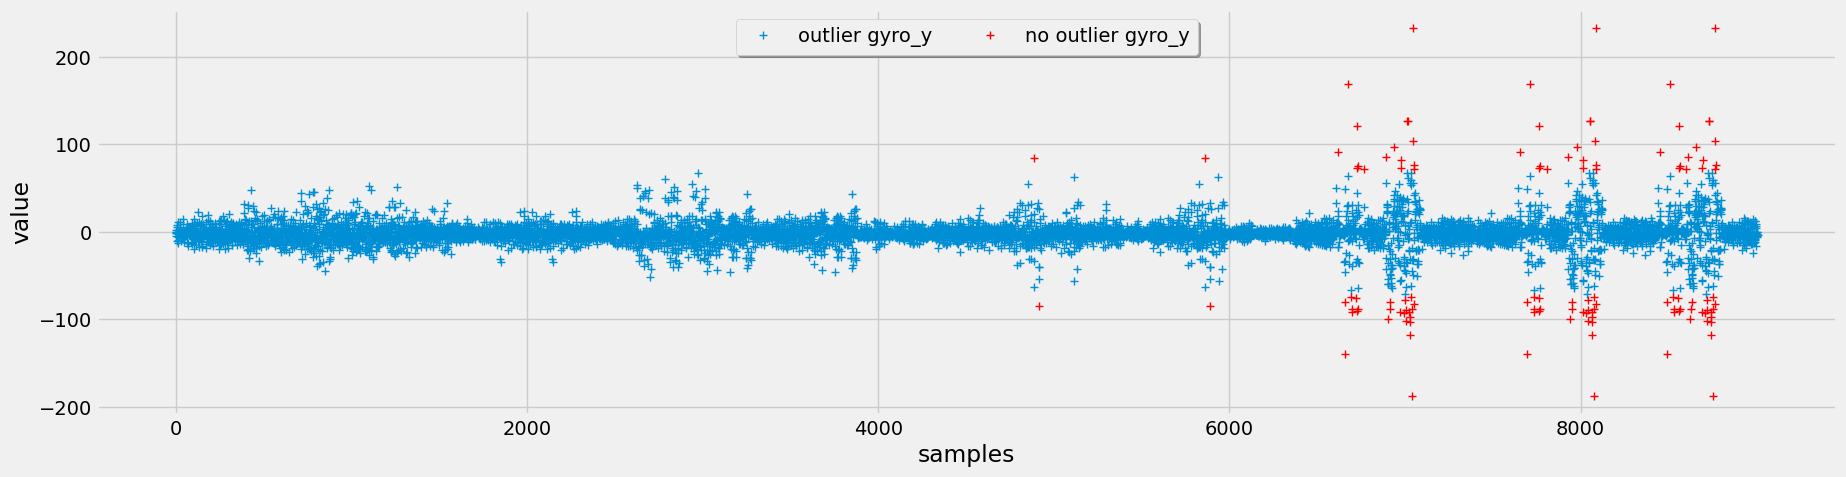

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


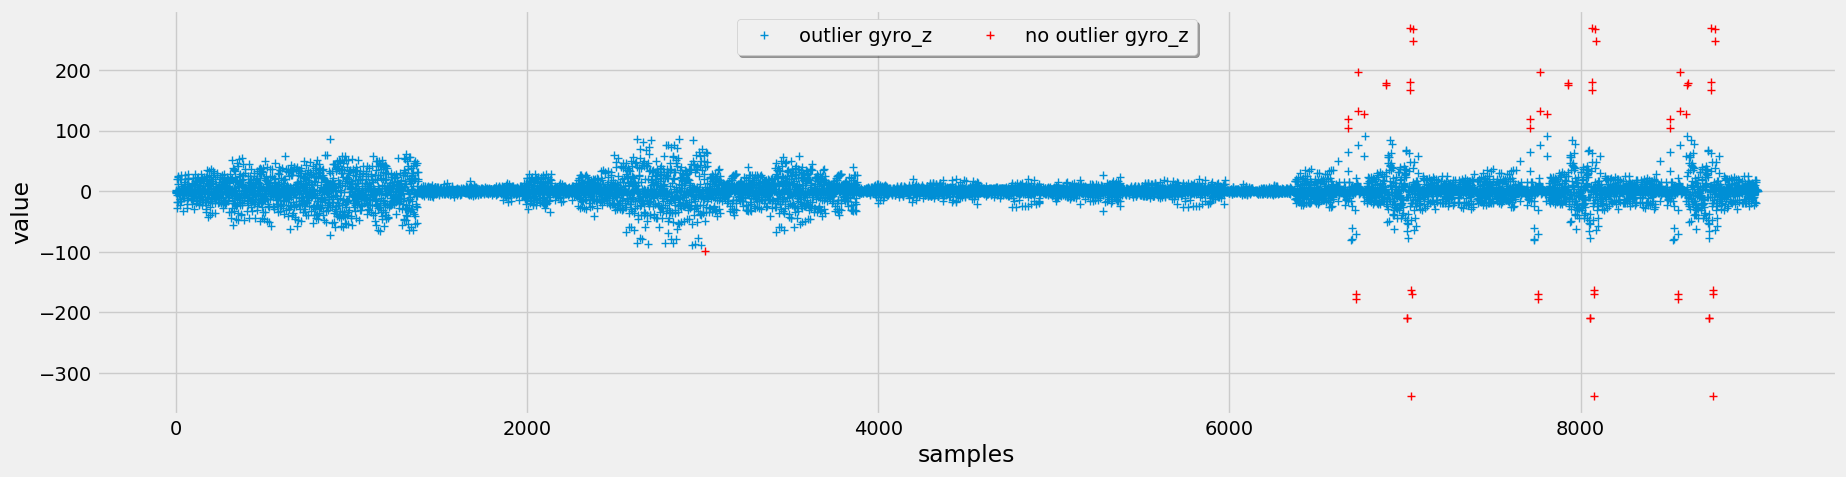

In [107]:
# Loop over all the columns
for col in outlier_columns:
    dataset = mark_outliers_chauvenet(df, col)
    plot_binary_outliers(dataset=dataset,col = col,outlier_col=col + "_outlier",reset_index=True)

In [108]:
# Local Outlier Function
def mark_outliers_lof(dataset, columns, n=20):
    """Mark values as outliers using LOF

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to
        n (int, optional): n_neighbors. Defaults to 20.
    
    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column
        indicating whether the value is an outlier or not.
    """
    
    dataset = dataset.copy()

    lof = LocalOutlierFactor(n_neighbors=n)
    data = dataset[columns]
    outliers = lof.fit_predict(data)
    X_scores = lof.negative_outlier_factor_

    dataset["outlier_lof"] = outliers == -1
    return dataset, outliers, X_scores

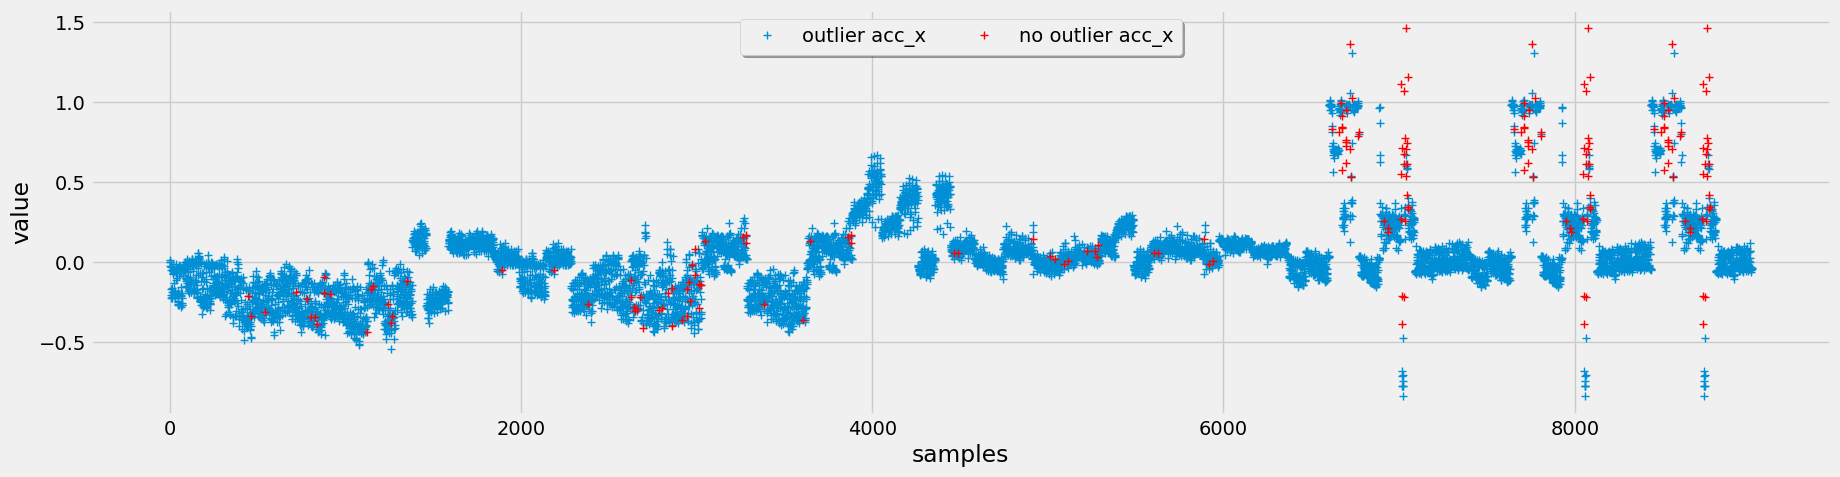

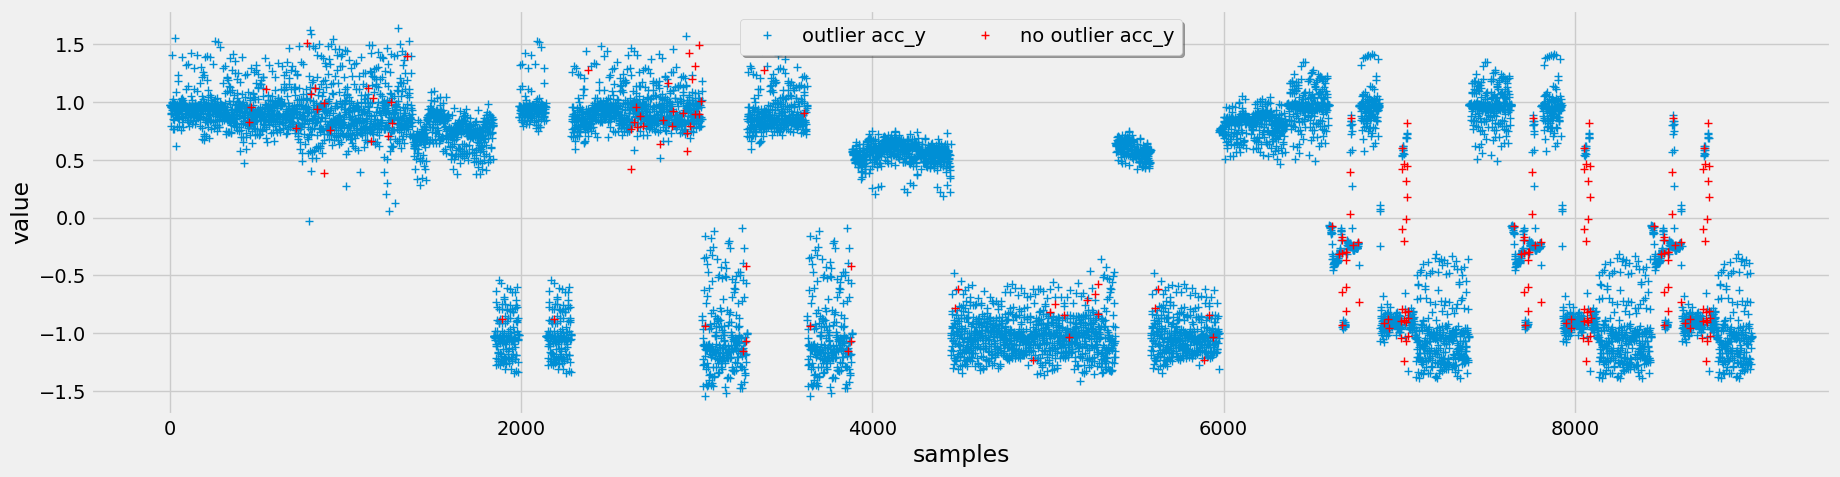

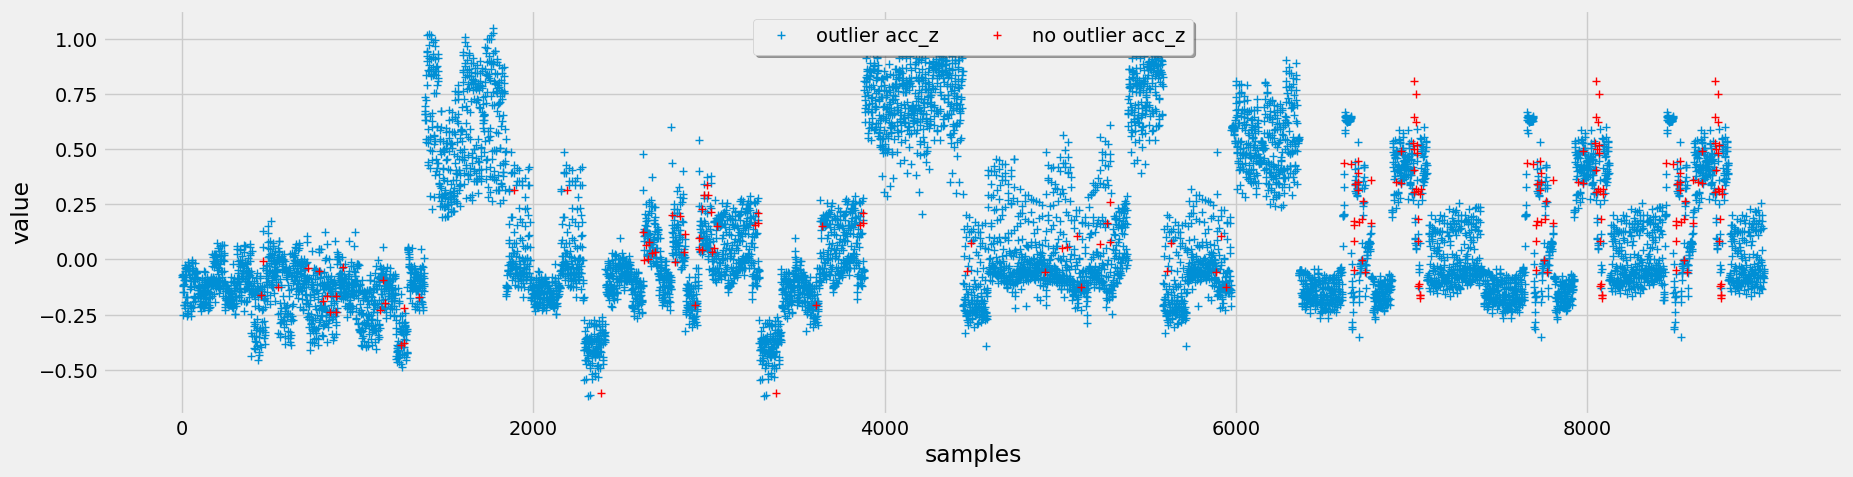

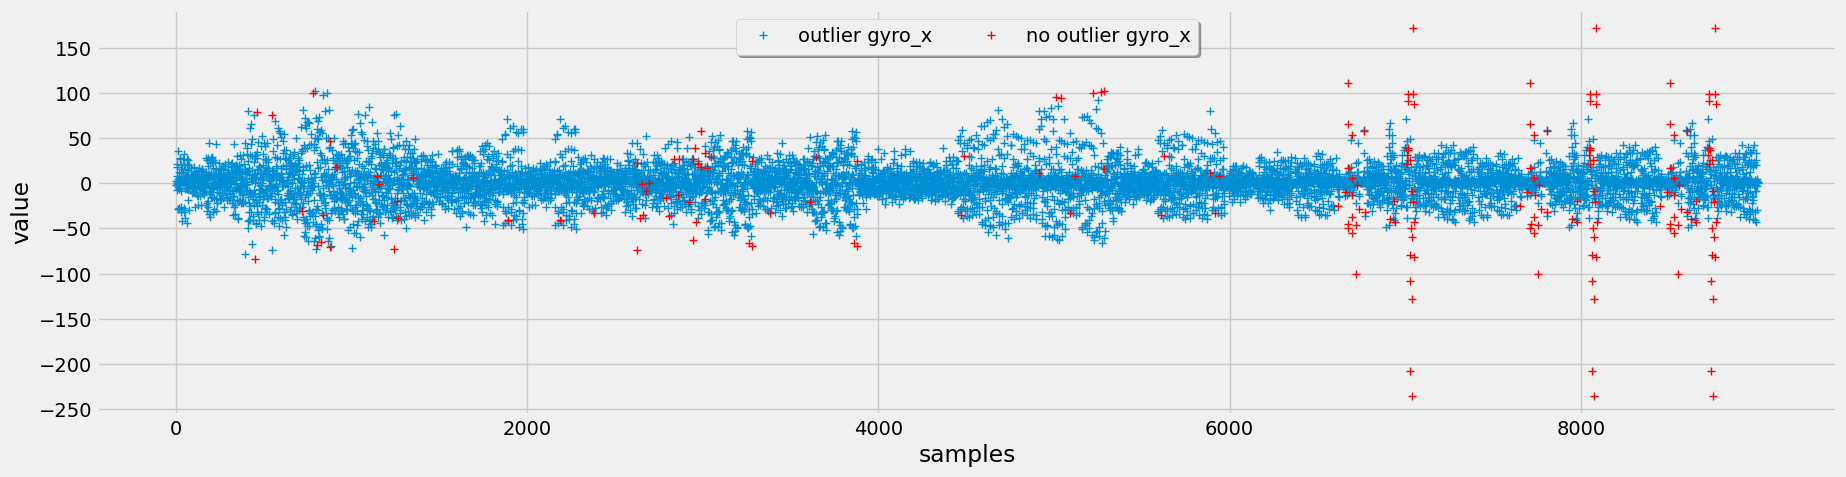

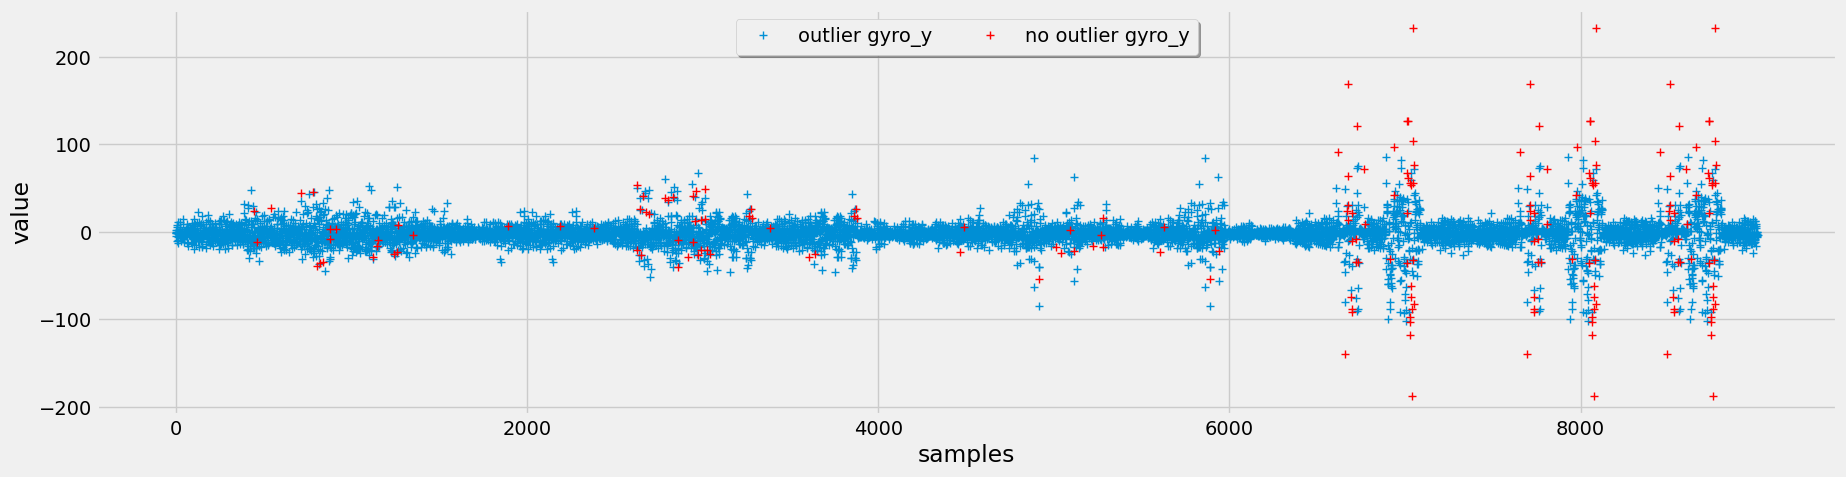

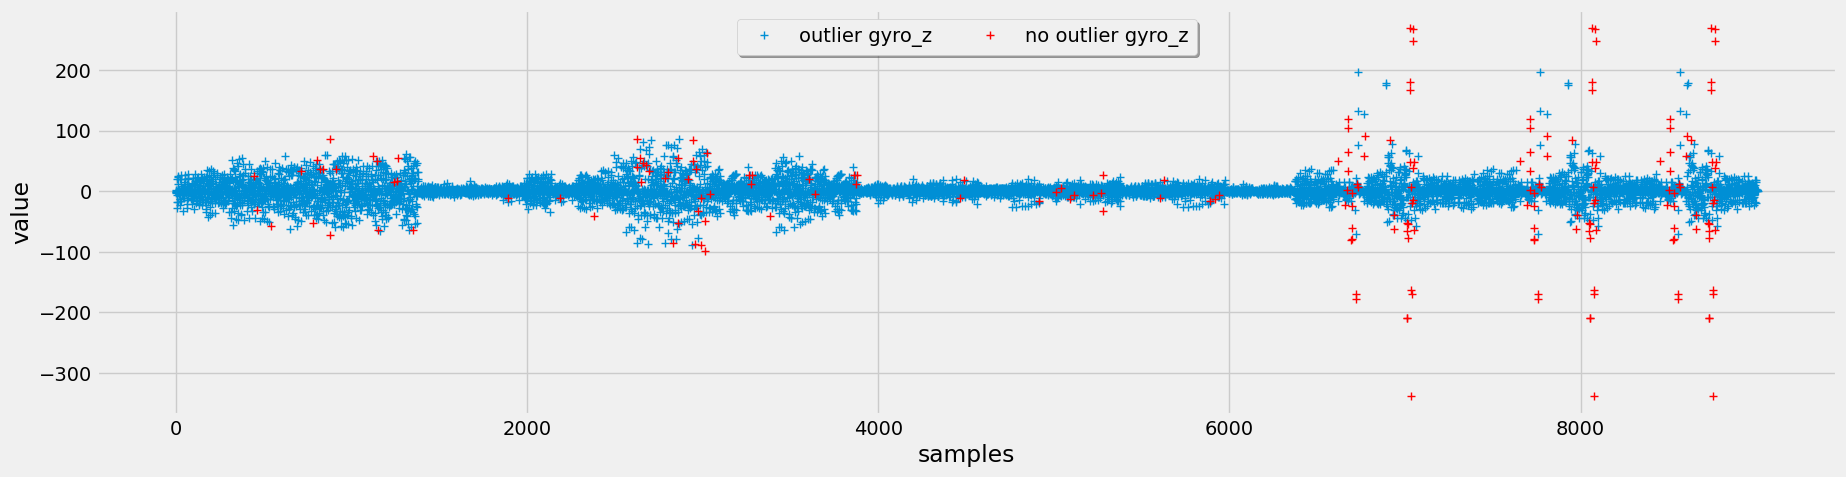

In [109]:
# Loop over all the columns
dataset, outliers, X_scores = mark_outliers_lof(df,outlier_columns)
for col in outlier_columns:
    plot_binary_outliers(dataset=dataset,col = col, outlier_col="outlier_lof",reset_index=True)

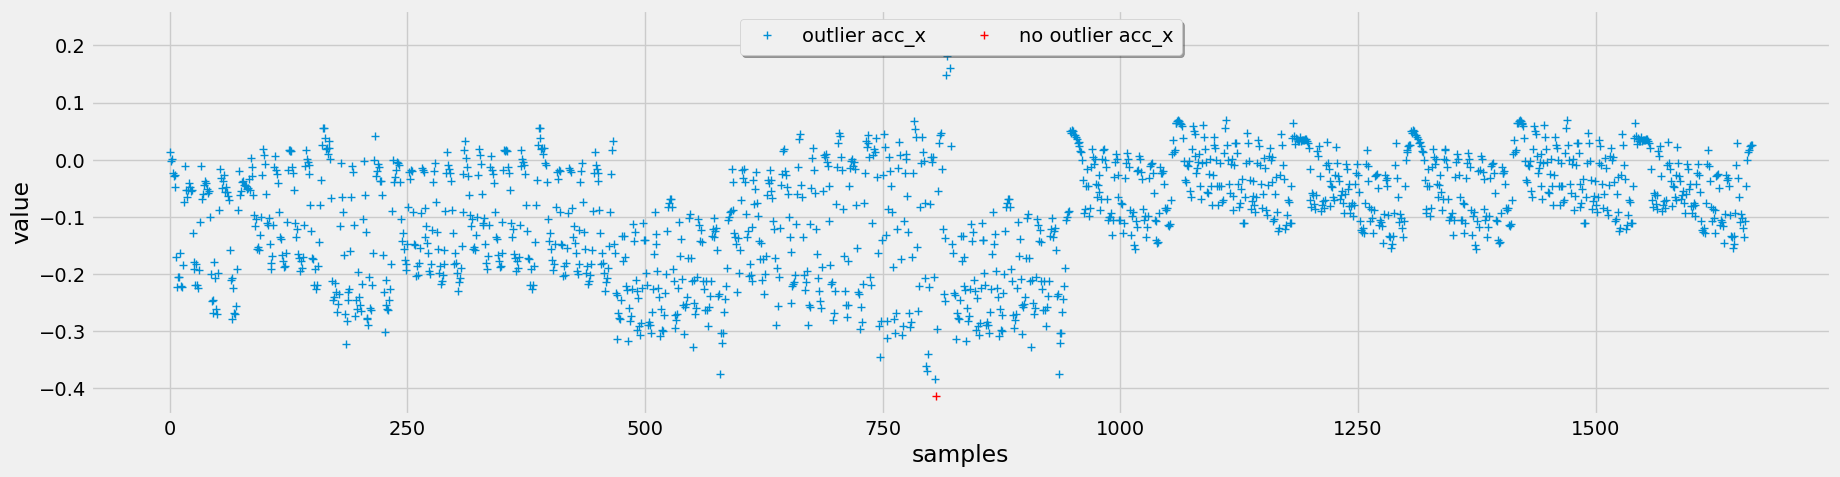

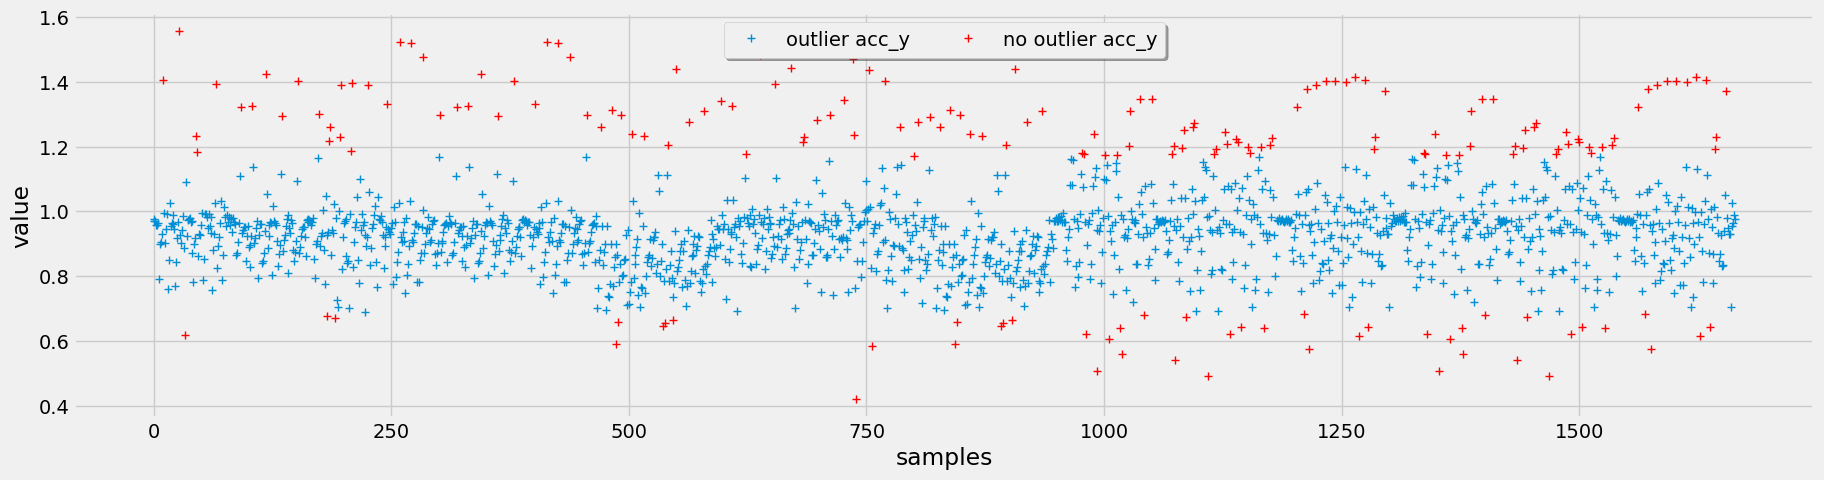

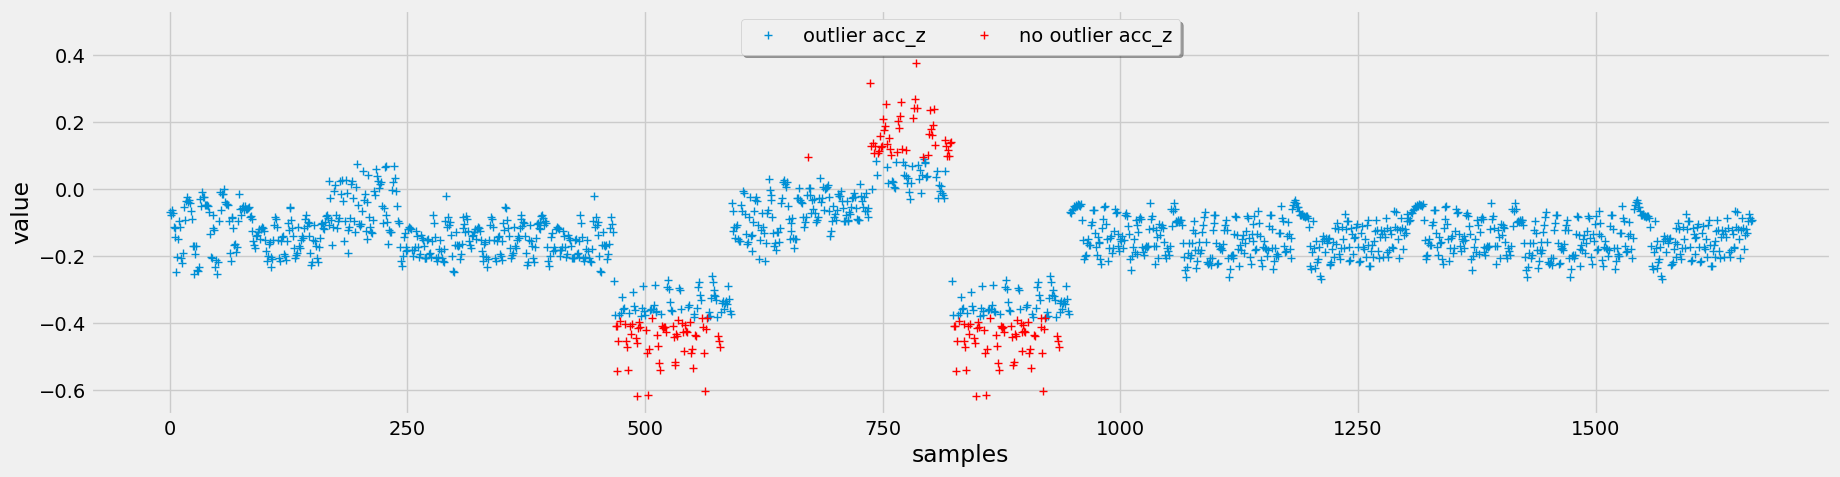

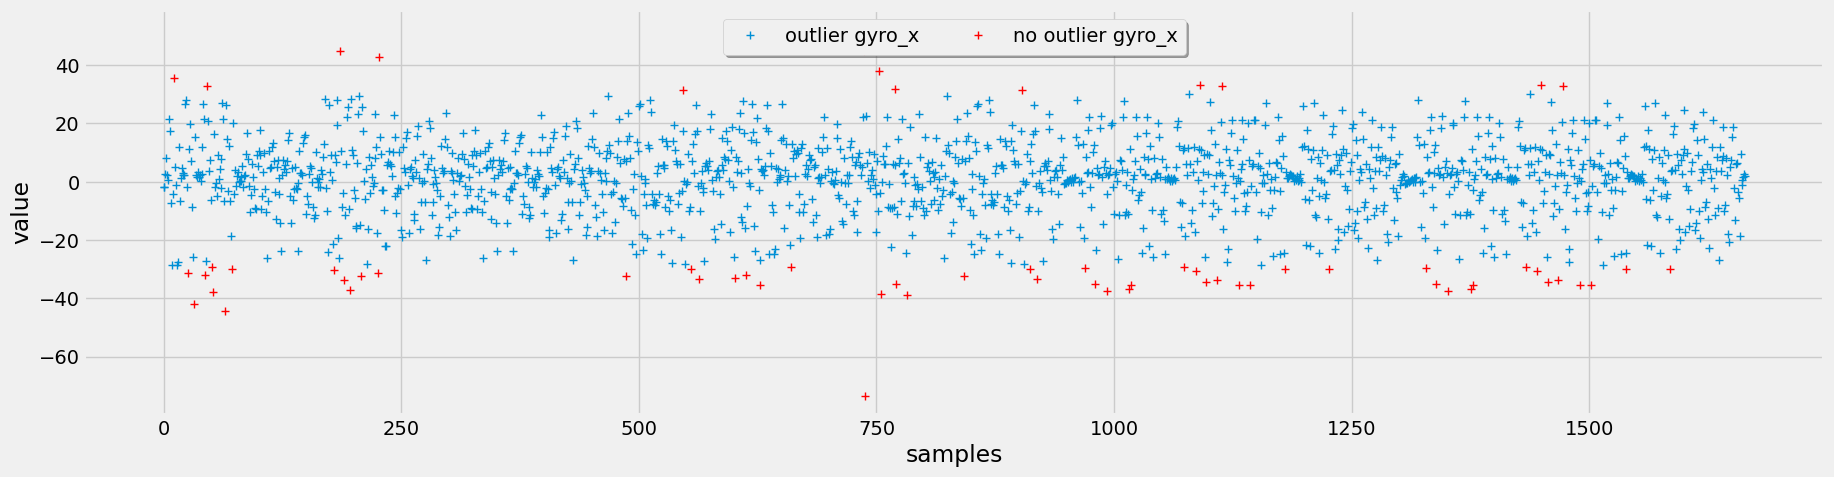

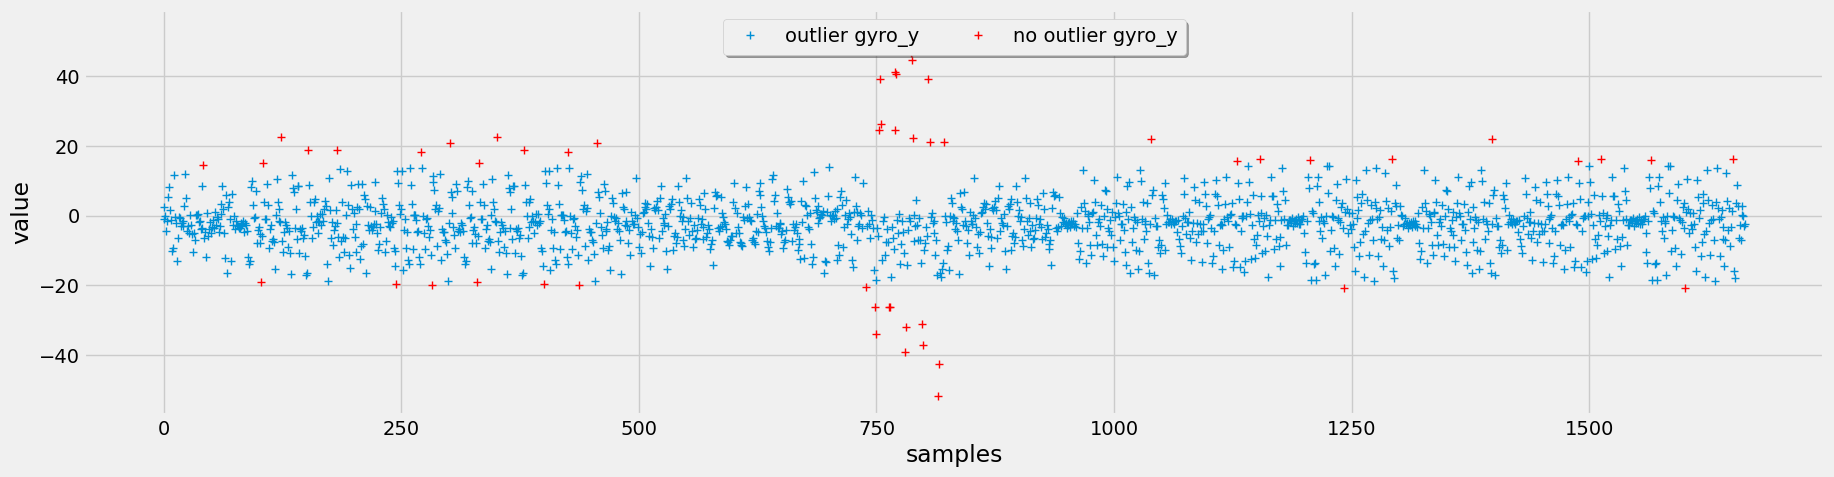

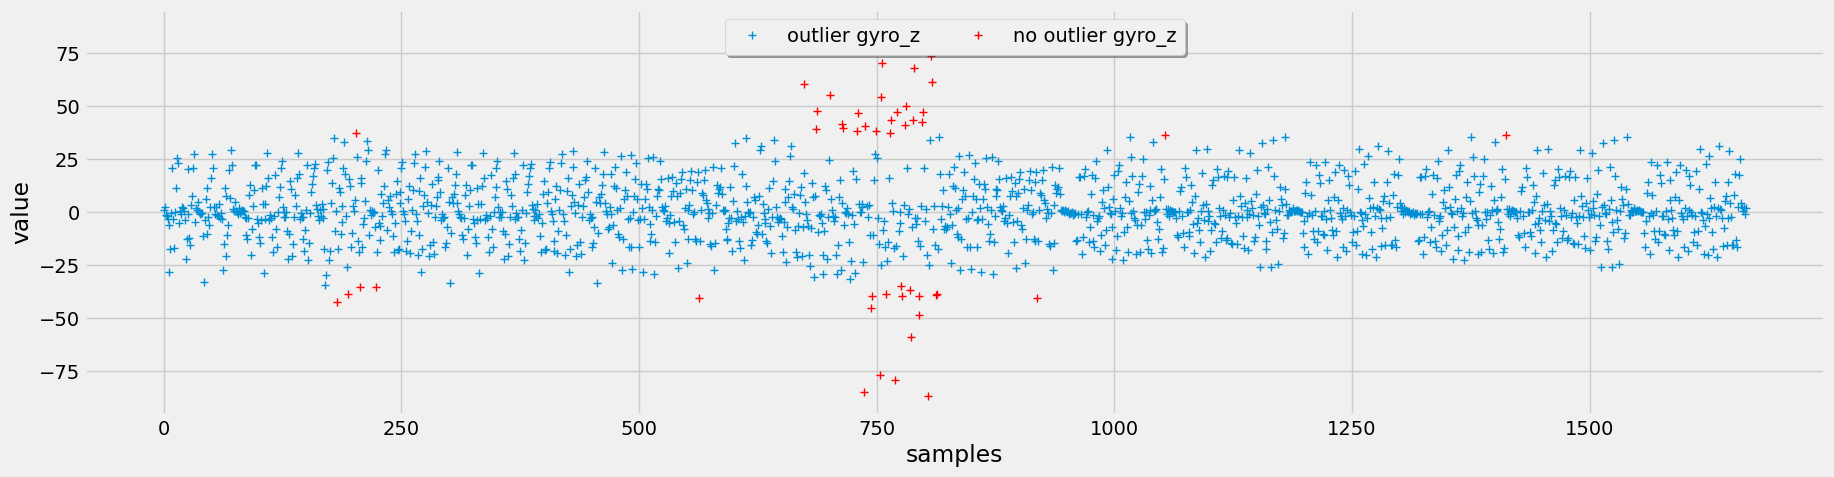

In [110]:
# Check outliers grouped by labels using IQR
label = "bench"
for col in outlier_columns:
    dataset =mark_outliers_iqr(df[df["label"]==label],col)
    plot_binary_outliers(dataset=dataset,col = col,outlier_col=col + "_outlier",reset_index=True)
    

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


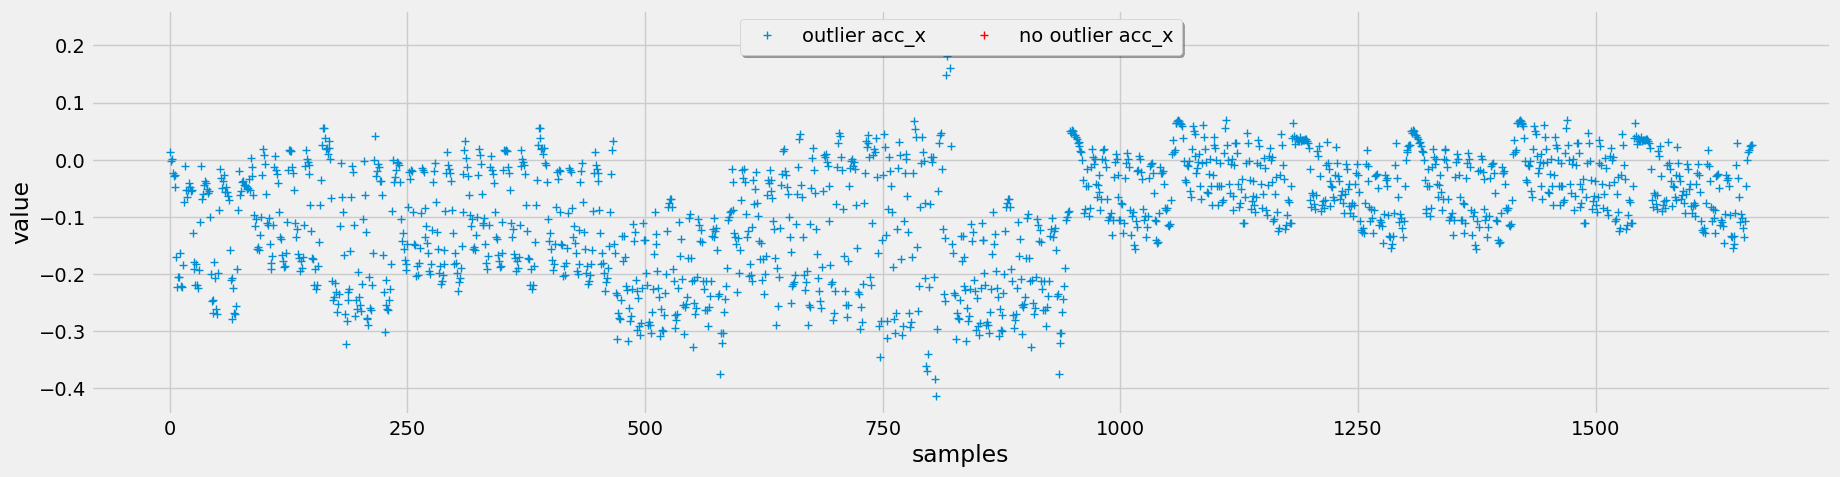

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


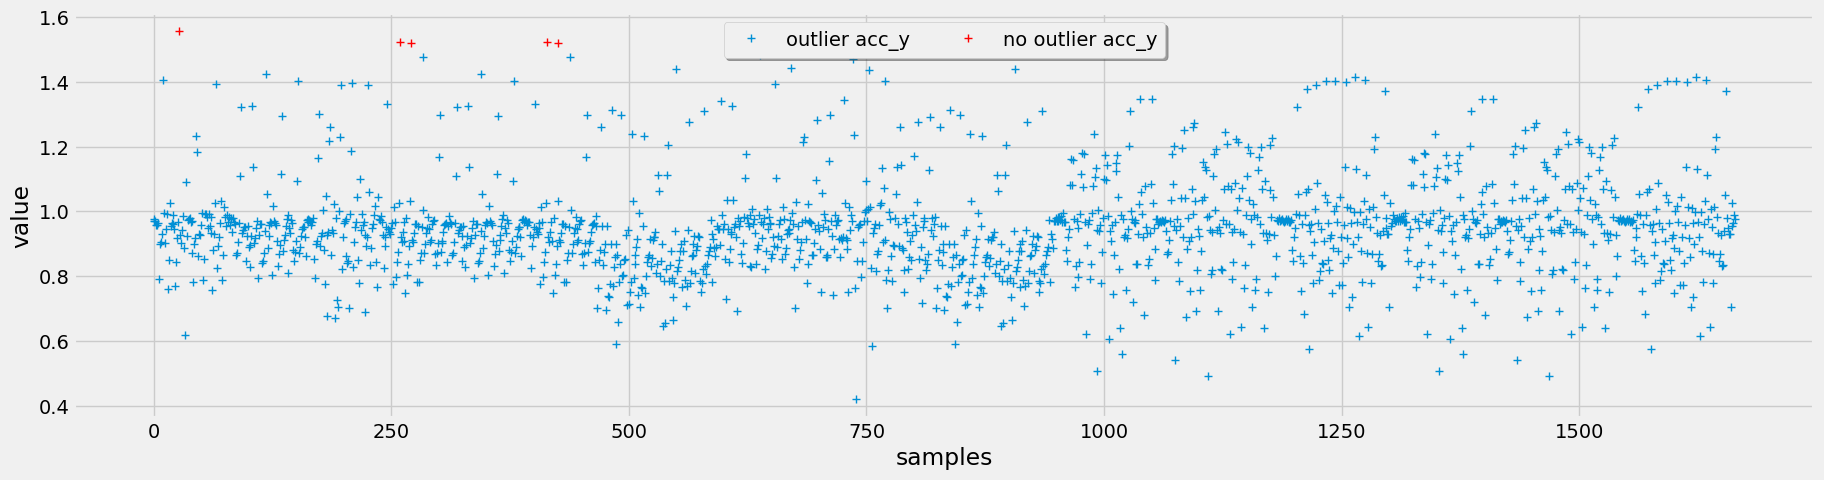

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


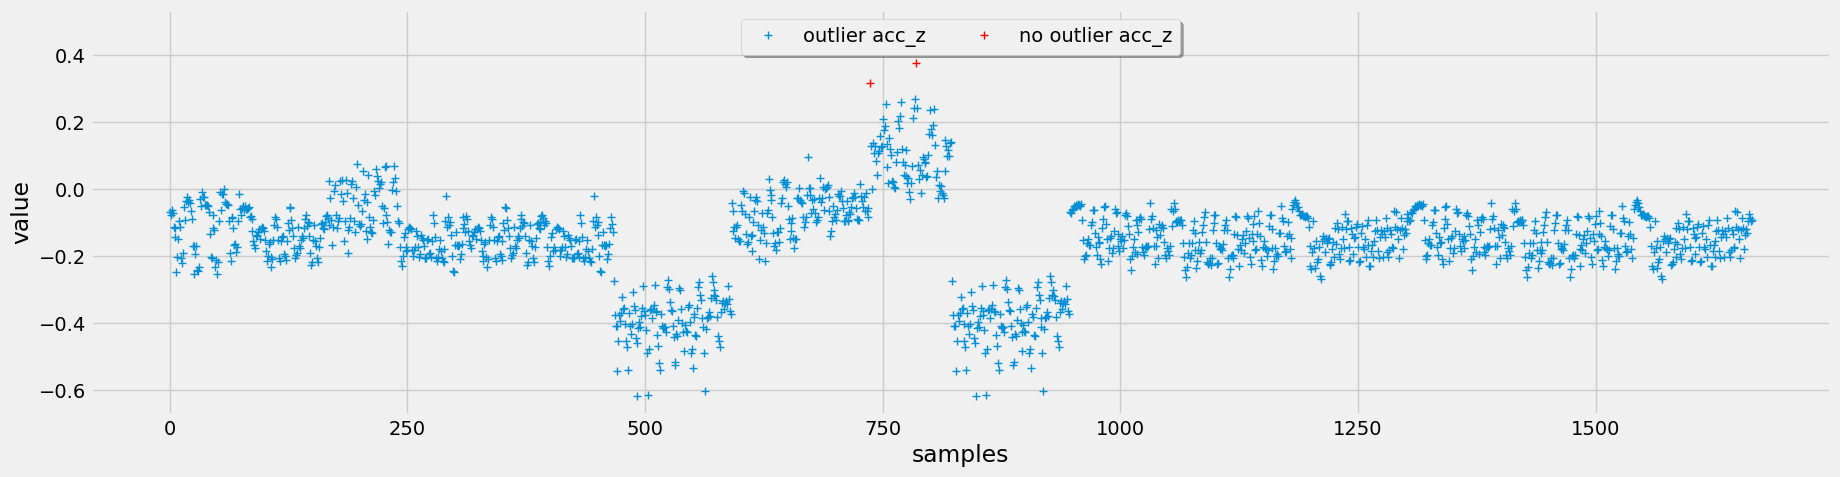

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


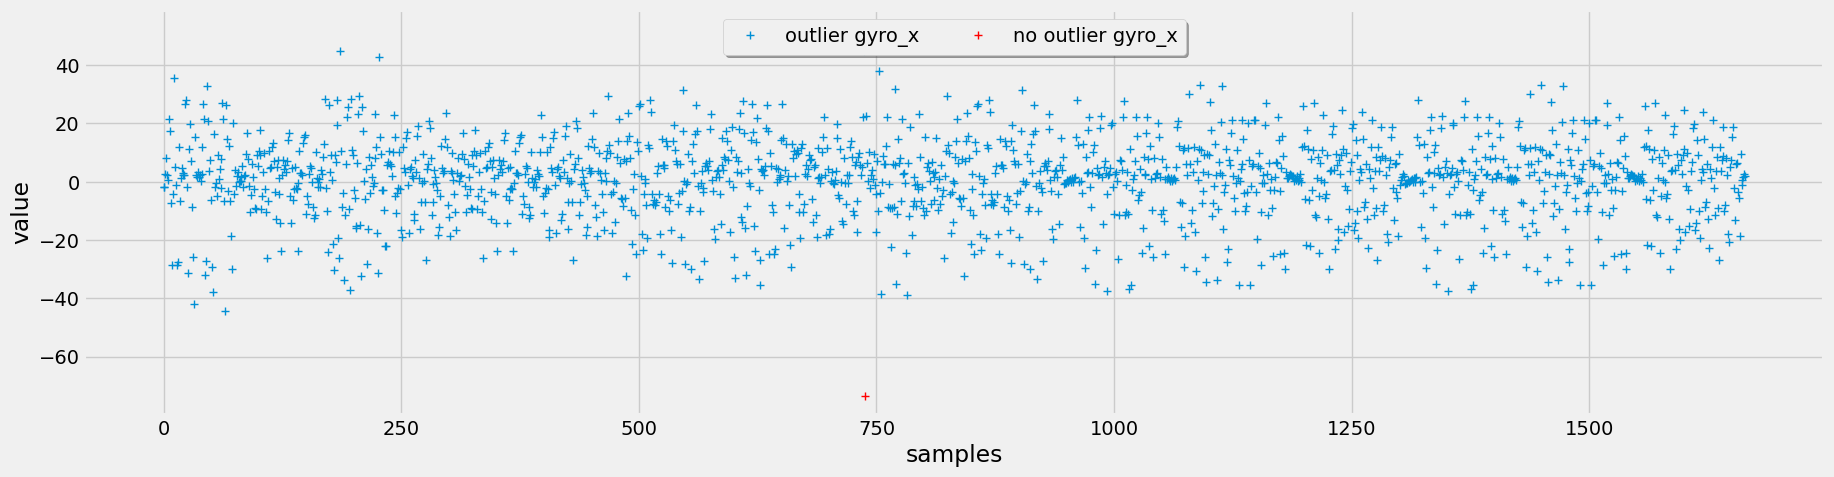

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


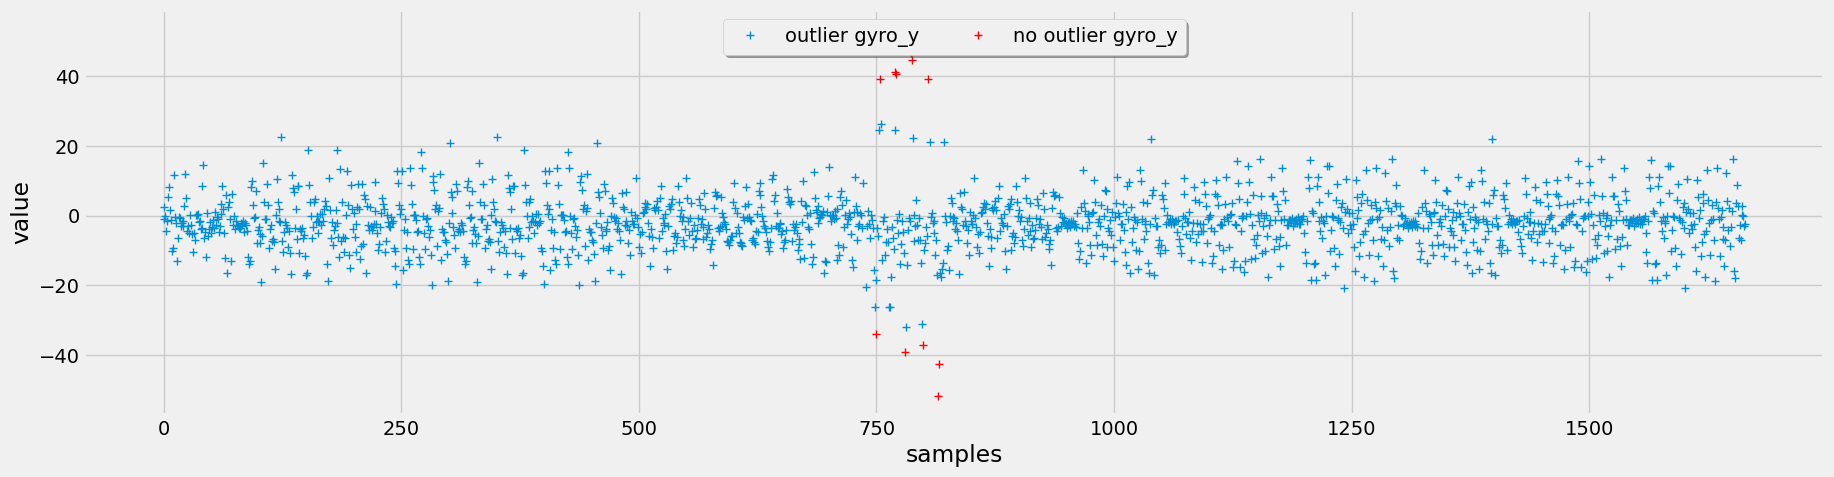

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


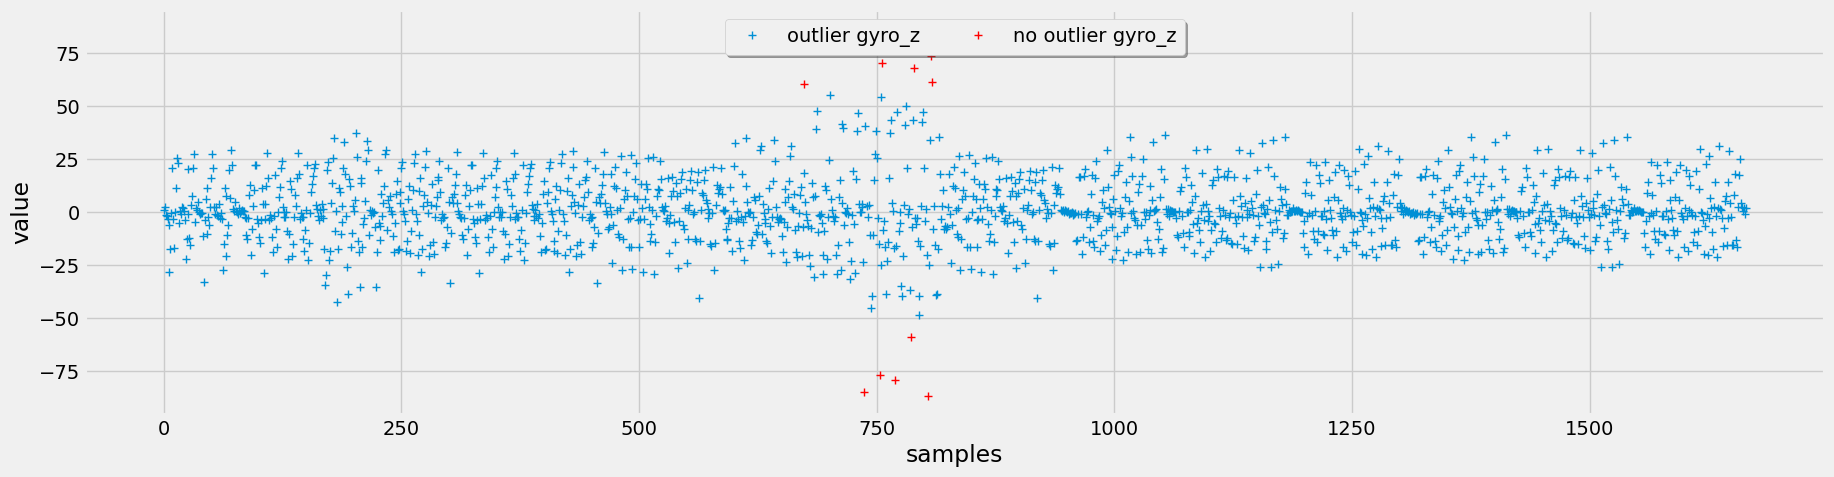

In [111]:
# Check outliers grouped by labels using Chauvenet
label = "bench"
for col in outlier_columns:
    dataset =mark_outliers_chauvenet(df[df["label"]==label],col)
    plot_binary_outliers(dataset=dataset,col = col,outlier_col=col + "_outlier",reset_index=True)
    

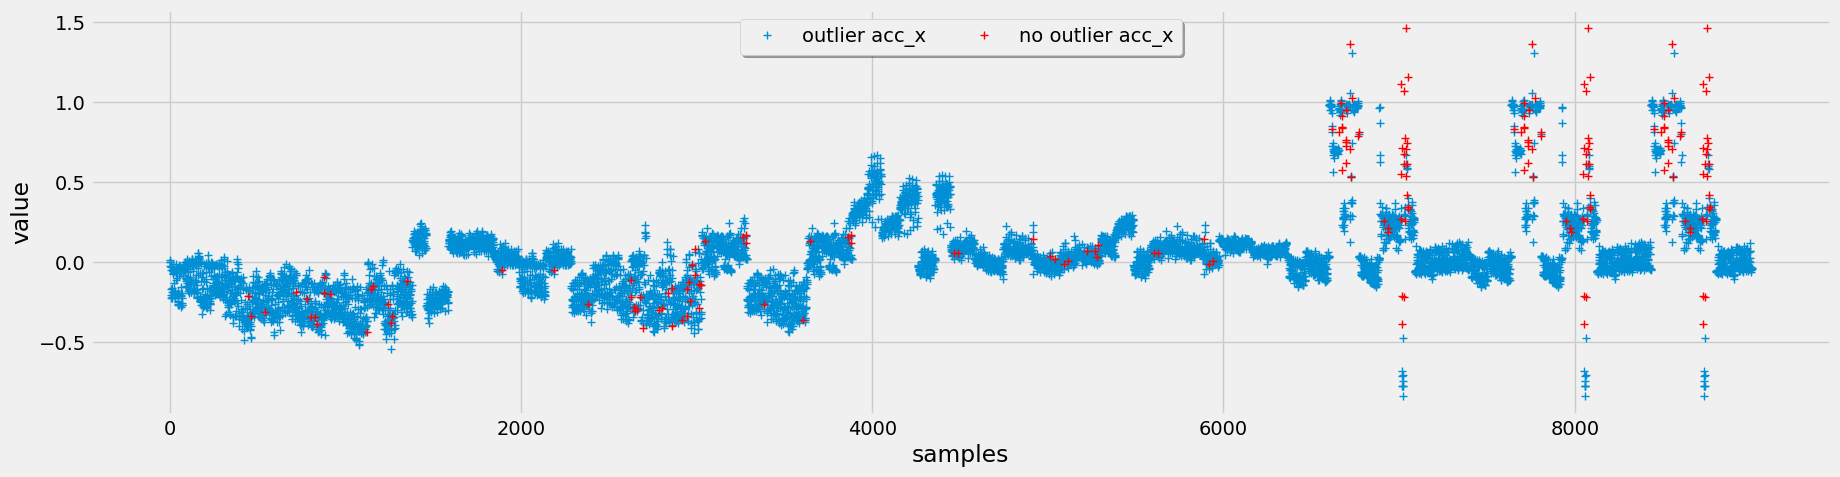

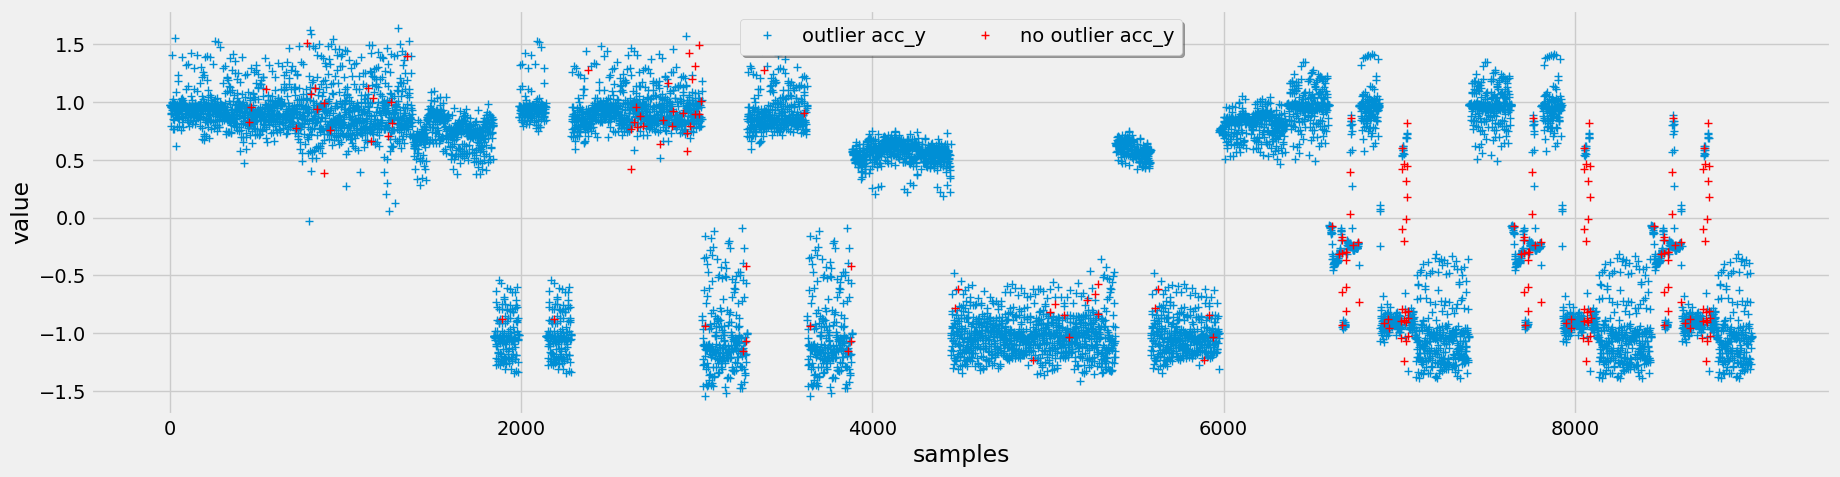

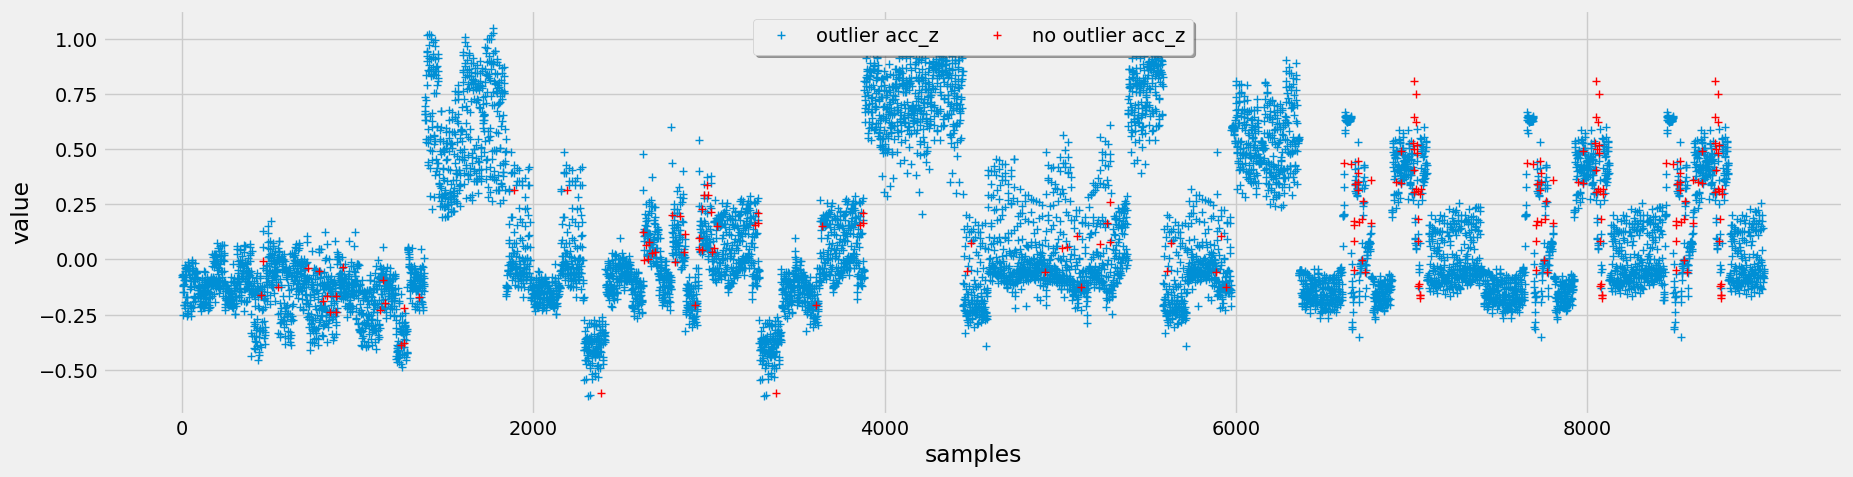

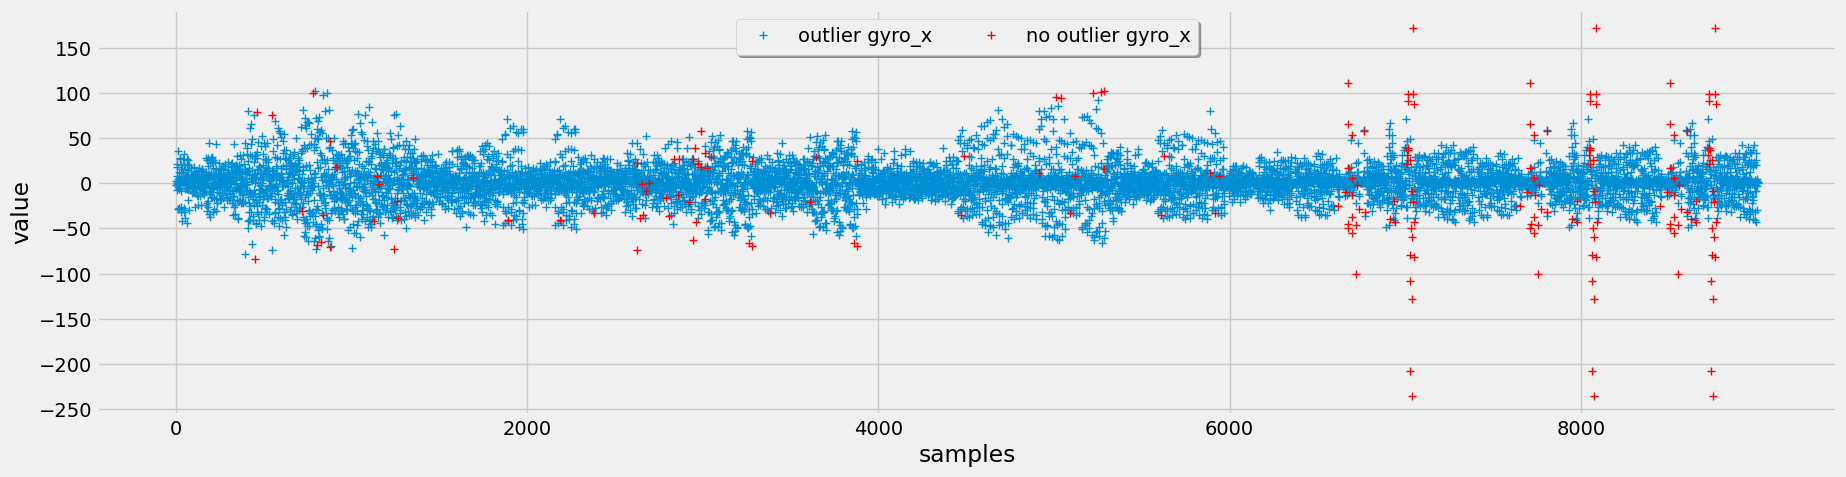

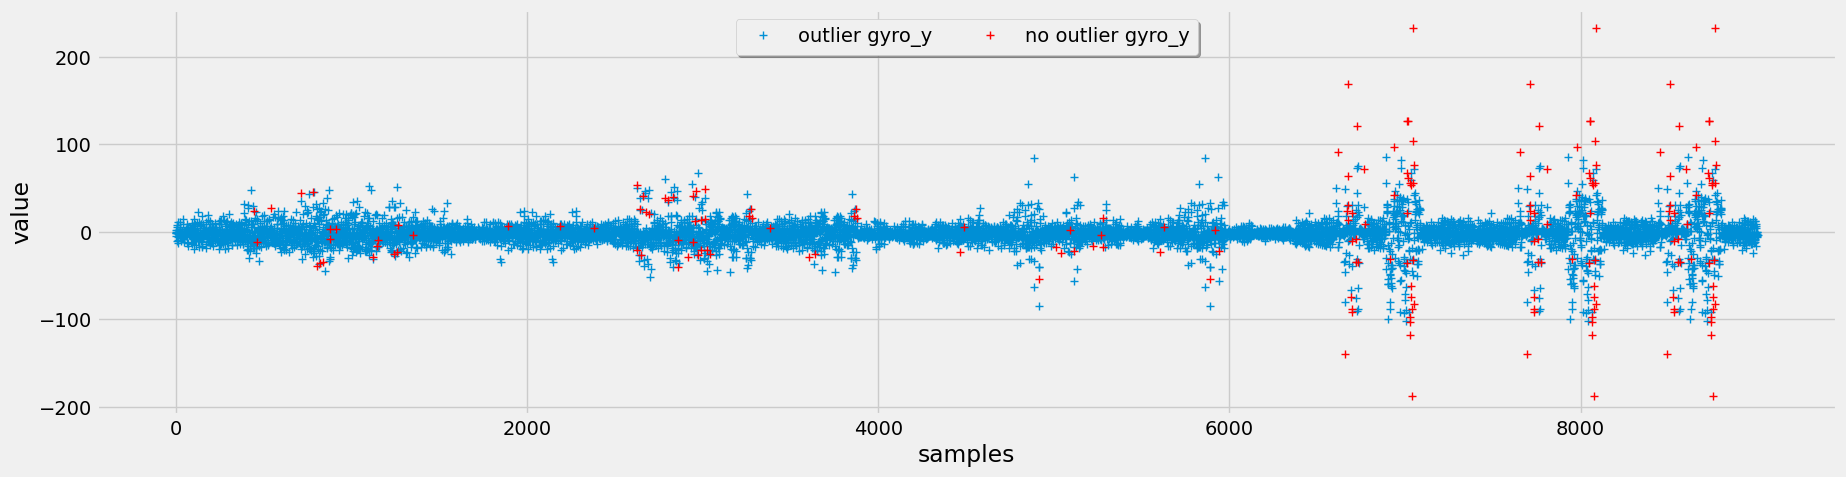

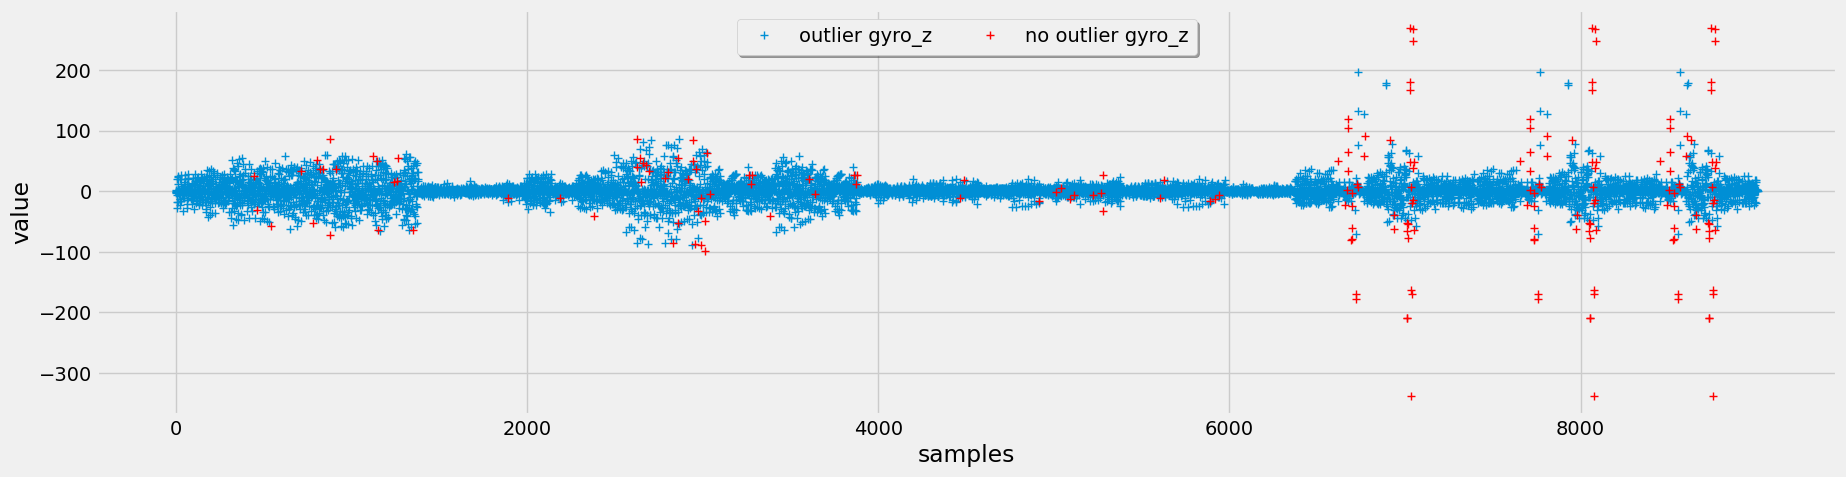

In [112]:
# Check outliers grouped by labels using LOF
label = "bench"
dataset, outliers, X_scores = mark_outliers_lof(df,outlier_columns)
for col in outlier_columns:
    plot_binary_outliers(dataset=dataset,col = col, outlier_col="outlier_lof",reset_index=True)

In [113]:
# Choosing a method to deal with the outliers
# Testing on a single column
dataset = mark_outliers_chauvenet(df, col=col)
dataset[dataset["gyro_z_outlier"]] # Displaying the outliers in the column

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


acc_x     acc_y  ...  set  gyro_z_outlier
epoch (ms)                                   ...                     
2019-01-14 13:57:41.800 -0.137000  1.495500  ...   46            True
2019-01-18 17:22:40.600  0.915500 -0.302500  ...   18            True
2019-01-18 17:22:40.800  0.846667 -0.645667  ...   18            True
2019-01-18 17:22:49.600  1.363667  0.030000  ...   18            True
2019-01-18 17:22:49.800  0.707500  0.390500  ...   18            True
2019-01-18 17:22:52.000  0.371333  0.580333  ...   18            True
2019-01-18 17:22:52.200  0.744500  0.272000  ...   18            True
2019-01-18 17:22:59.600  0.800000 -0.406333  ...   18            True
2019-01-18 17:25:40.400  0.623500 -0.247500  ...   20            True
2019-01-18 17:25:40.600  0.669333 -0.957000  ...   20            True
2019-01-18 17:26:04.800  1.115000 -0.792500  ...   20            True
2019-01-18 17:26:05.000  0.714000 -0.101000  ...   20            True
2019-01-18 17:26:07.400 -0.217667  0.465667  ...   20            True
2019-01-18 17:26:07.600  0.616000 -0.205500  ...   20            True
2019-01-18 17:26:07.800  1.070333 -1.238333  ...   20            True
2019-01-18 17:26:09.400  0.773667 -1.072000  ...   20            True
2019-01-18 17:26:09.600  1.464000 -0.902000  ...   20            True
2019-01-18 17:26:09.800  0.709333 -0.014667  ...   20            True
2019-01-18 17:26:11.600  0.419000  0.175500  ...   20            True
2019-01-18 17:26:11.800  1.155333 -0.807667  ...   20            True
2019-01-19 17:22:40.600  0.915500 -0.302500  ...   19            True
2019-01-19 17:22:40.800  0.846667 -0.645667  ...   19            True
2019-01-19 17:22:49.600  1.363667  0.030000  ...   19            True
2019-01-19 17:22:49.800  0.707500  0.390500  ...   19            True
2019-01-19 17:22:52.000  0.371333  0.580333  ...   19            True
2019-01-19 17:22:52.200  0.744500  0.272000  ...   19            True
2019-01-19 17:22:59.600  0.800000 -0.406333  ...   19            True
2019-01-19 17:25:40.400  0.623500 -0.247500  ...   21            True
2019-01-19 17:25:40.600  0.669333 -0.957000  ...   21            True
2019-01-19 17:26:04.800  1.115000 -0.792500  ...   21            True
2019-01-19 17:26:05.000  0.714000 -0.101000  ...   21            True
2019-01-19 17:26:07.400 -0.217667  0.465667  ...   21            True
2019-01-19 17:26:07.600  0.616000 -0.205500  ...   21            True
2019-01-19 17:26:07.800  1.070333 -1.238333  ...   21            True
2019-01-19 17:26:09.400  0.773667 -1.072000  ...   21            True
2019-01-19 17:26:09.600  1.464000 -0.902000  ...   21            True
2019-01-19 17:26:09.800  0.709333 -0.014667  ...   21            True
2019-01-19 17:26:11.600  0.419000  0.175500  ...   21            True
2019-01-19 17:26:11.800  1.155333 -0.807667  ...   21            True
2019-01-20 17:22:40.600  0.915500 -0.302500  ...   80            True
2019-01-20 17:22:40.800  0.846667 -0.645667  ...   80            True
2019-01-20 17:22:49.600  1.363667  0.030000  ...   80            True
2019-01-20 17:22:49.800  0.707500  0.390500  ...   80            True
2019-01-20 17:22:52.000  0.371333  0.580333  ...   80            True
2019-01-20 17:22:52.200  0.744500  0.272000  ...   80            True
2019-01-20 17:22:59.600  0.800000 -0.406333  ...   80            True
2019-01-20 17:25:40.400  0.623500 -0.247500  ...   82            True
2019-01-20 17:25:40.600  0.669333 -0.957000  ...   82            True
2019-01-20 17:26:04.800  1.115000 -0.792500  ...   82            True
2019-01-20 17:26:05.000  0.714000 -0.101000  ...   82            True
2019-01-20 17:26:07.400 -0.217667  0.465667  ...   82            True
2019-01-20 17:26:07.600  0.616000 -0.205500  ...   82            True
2019-01-20 17:26:07.800  1.070333 -1.238333  ...   82            True
2019-01-20 17:26:09.400  0.773667 -1.072000  ...   82            True
2019-01-20 17:26:09.600  1.464000 -0.902000  ...   82            True
2019-01-20 17:26:09.800  0.709333 -0.0

In [121]:
# Replacing the values associated with the outliers as nan
dataset.loc[dataset["gyro_z_outlier"], "gyro_z"] = np.nan
dataset

acc_x     acc_y  ...  set  gyro_z_outlier
epoch (ms)                                   ...                     
2019-01-11 15:08:05.200  0.013500  0.977000  ...   30           False
2019-01-11 15:08:05.400 -0.001500  0.970500  ...   30           False
2019-01-11 15:08:05.600  0.001333  0.971667  ...   30           False
2019-01-11 15:08:05.800 -0.024000  0.957000  ...   30           False
2019-01-11 15:08:06.000 -0.028000  0.957667  ...   30           False
...                           ...       ...  ...  ...             ...
2019-01-20 17:33:27.000 -0.048000 -1.041500  ...   90           False
2019-01-20 17:33:27.200 -0.037000 -1.030333  ...   90           False
2019-01-20 17:33:27.400 -0.060000 -1.031000  ...   90           False
2019-01-20 17:33:27.600 -0.038667 -1.025667  ...   90           False
2019-01-20 17:33:27.800 -0.044000 -1.034000  ...   90           False

[9009 rows x 11 columns]

In [126]:
# Create a loop to perform the transformation
outliers_removed_df = df.copy()
outliers_removed_df

for col in outlier_columns:
    for label in df["label"].unique():
        dataset =mark_outliers_chauvenet(df[df["label"]==label],col)
        dataset.loc[dataset[col + "_outlier"], col] = np.nan

        # Updating the columns in the original dataframe
        outliers_removed_df.loc[(outliers_removed_df["label"]==label), col] = dataset[col]

        n_outliers = len(dataset) - len(dataset[col].dropna())
        print(f"Removed {n_outliers} from {col} of {label}")

C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

Removed 0 from acc_x of bench
Removed 2 from acc_x of ohp
Removed 0 from acc_x of squat
Removed 2 from acc_x of dead
Removed 0 from acc_x of row
Removed 0 from acc_x of rest
Removed 5 from acc_y of bench


C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

Removed 6 from acc_y of ohp
Removed 0 from acc_y of squat
Removed 0 from acc_y of dead
Removed 0 from acc_y of row
Removed 0 from acc_y of rest
Removed 3 from acc_z of bench
Removed 6 from acc_z of ohp


C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

Removed 0 from acc_z of squat
Removed 1 from acc_z of dead
Removed 0 from acc_z of row
Removed 0 from acc_z of rest
Removed 2 from gyro_x of bench
Removed 4 from gyro_x of ohp
Removed 1 from gyro_x of squat


C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

Removed 6 from gyro_x of dead
Removed 0 from gyro_x of row
Removed 12 from gyro_x of rest
Removed 14 from gyro_y of bench
Removed 15 from gyro_y of ohp
Removed 9 from gyro_y of squat
Removed 14 from gyro_y of dead
Removed 10 from gyro_y of row


C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

Removed 9 from gyro_y of rest
Removed 13 from gyro_z of bench
Removed 1 from gyro_z of ohp
Removed 12 from gyro_z of squat
Removed 14 from gyro_z of dead
Removed 0 from gyro_z of row
Removed 24 from gyro_z of rest


C:\Users\ICG312\AppData\Local\Temp\ipykernel_48112\3058972928.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


In [127]:
# Exporting the dataframe
outliers_removed_df.to_pickle("outlier_chavenets.pkl")